# <span style='font-family:"Times New Roman"'> <span styel=''> Project #1 Image Segmentation

## <span style='font-family:"Times New Roman"'> <span styel=''> In this project, we will be using the Berkeley Segmentation Dataset 300. 
https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/
## <span style='font-family:"Times New Roman"'> <span styel=''>The description of the segmentation (ground truth) file format can be found at: 
https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/seg-format.txt
## <span style='font-family:"Times New Roman"'> <span styel=''>The image files and human segmentation files can be downloaded at following links:
https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300-images.tgz
https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300-human.tgz


## <span style='font-family:"Times New Roman"'> <span styel=''> Loading Required Modules:

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.morphology 
import skimage.feature
import skimage.filters
import skimage.measure 
from PIL import Image
import skimage.color
import pandas as pd
import numpy as np
import imageio
import glob
import time
import sys
import os
%matplotlib inline

In [3]:
plt.rcParams["font.family"] = "Times New Roman"  #Setting Global Font to Times New Roman

In [4]:
#Changing the directory to a directory where this notebook is located
#to avoid hardcoding
abspath = os.path.abspath('') 
os.chdir(abspath)

# <span style='font-family:"Times New Roman"'> <span styel=''> Generate Ground Truth image masks:

### <span style='font-family:"Times New Roman"'> <span styel=''>In this section, using provided `.Seg` files which are `ASCII` files , for each image, a mask is going to be generated. 

## <span style='font-family:"Times New Roman"'> <span styel=''> (a-i) make_mask Function

### <span style='font-family:"Times New Roman"'> <span styel=''>This function reads the segmentation file name and generate a mask for that segmentation file. The input for this function is the segmentation name not the segmentation file itself.   

In [5]:
def make_mask(seg_filename,mask_filename):    
    #Parsing segmentation files as a panda data frame 
    #by dropping first row and first column of the segmentation file:     
    h = pd.read_csv(seg_filename, sep=' ', skiprows=1, skipinitialspace=True, engine='python').drop([0])
    h = h.drop(h.columns[-2:],axis=1)
    
    #Renaming column headers based on provided readme file for the dataset:
    h.columns = ['s', 'r', 'c1' , 'c2']
    
    #Generating a zero matrix with size of targeted image for faster implementation of the code:
    mask = np.zeros((h['r'][3].astype(int), h['r'][2].astype(int)))
    
    #Dropping irrelevant columns for less memory usage:
    h = h.drop(h.index[0:8]).reset_index(drop=True)
    
    #Resetting indexes to start looping on panda dataframe: 
    h = h[h.s.astype(int) != 0].reset_index(drop=True)
    
    #Converting all the elements of panda dataframe to integers: 
    h = h.astype(int)
    
    #Removing the file extension from filename:
    mask_filename = os.path.basename(image_filename)[:-4]
    
    #Looping over the rows of the panda dataframe and assigning values in 
    #column `s` to specific columns `c1 to c2+1`  in the same row. 
    for i in range (h.shape[0]):
        mask[h.r[i],h.c1[i]:h.c2[i]+1] = h.s[i]
    return mask

## <span style='font-family:"Times New Roman"'> <span styel=''> (a-ii) Loop Over Dataset

### <span style='font-family:"Times New Roman"'> <span styel=''>In this section, I am looping over the dataset and generating mask files from provided `seg` files. Then these mask images are going to be saved as `png` format in designated directories. 
    
### <span style='font-family:"Times New Roman"'> <span styel=''>There are four different sets of segmentation files, hence, four different loop is implemented. 
    
### <span style='font-family:"Times New Roman"'> <span styel=''>In this section, total number of 600 mask images will be generated.    

In [6]:
#Setting image and segmentation files directories: 
image_directory = 'BSDS300-images\\BSDS300\\images\\test'
seg_directory = 'BSDS_GT_image_sorted\\BSDS300\\ground_truth\\color\\test'

#Saving image files’ name and sorting them: 
image_filenames = sorted(glob.glob(image_directory+'\\*.jpg'))

#Saving segmentation  files’ name and sorting them: 
seg_filenames = sorted(glob.glob(seg_directory+'\\*.seg'))

#Looping over images:
for f,image_filename in enumerate(image_filenames):
    seg_filename = seg_filenames[f]
    mask_filename = os.path.basename(image_filename)[:-4]
    mask = make_mask(seg_filename,mask_filename)
    name = os.path.basename(image_filename)[:-4]
    
    #Converting array to image for saving:
    im = Image.fromarray(mask)
    if im != 'RGB':
        im = im.convert('RGB')
    im.save('Masks\\Color\\Test\\' + name + '.png', cmap='gray') #Saving Image as png format

In [7]:
#Setting image and segmentation files directories: 
image_directory = 'BSDS300-images\\BSDS300\\images\\train'
seg_directory = 'BSDS_GT_image_sorted\\BSDS300\\ground_truth\\color\\train'

#Saving image files’ name and sorting them:
image_filenames = sorted(glob.glob(image_directory+'\\*.jpg'))

#Saving segmentation  files’ name and sorting them:
seg_filenames = sorted(glob.glob(seg_directory+'\\*.seg'))

#Looping over images:
for f,image_filename in enumerate(image_filenames):
    seg_filename = seg_filenames[f]
    mask_filename = os.path.basename(image_filename)[:-4]
    mask = make_mask(seg_filename,mask_filename)
    name = os.path.basename(image_filename)[:-4]
    
    #Converting array to image for saving:
    im = Image.fromarray(mask)
    if im != 'RGB':
        im = im.convert('RGB')
    im.save('Masks\\Color\\Train\\' + name + '.png', cmap='gray') #Saving Image as png format

In [8]:
#Setting image and segmentation files directories: 
image_directory = 'BSDS300-images\\BSDS300\\images\\test'
seg_directory = 'BSDS_GT_image_sorted\\BSDS300\\ground_truth\\gray\\test'

#Saving image files’ name and sorting them:
image_filenames = sorted(glob.glob(image_directory+'\\*.jpg'))

#Saving segmentation  files’ name and sorting them:
seg_filenames = sorted(glob.glob(seg_directory+'\\*.seg'))

#Looping over images:
for f,image_filename in enumerate(image_filenames):
    seg_filename = seg_filenames[f]
    mask_filename = os.path.basename(image_filename)[:-4]
    mask = make_mask(seg_filename,mask_filename)
    name = os.path.basename(image_filename)[:-4]
    
    #Converting array to image for saving:
    im = Image.fromarray(mask)
    if im != 'RGB':
        im = im.convert('RGB')
    im.save('Masks\\Gray\\Test\\' + name + '.png', cmap='gray') #Saving Image as png format

In [9]:
#Setting image and segmentation files directories: 
image_directory = 'BSDS300-images\\BSDS300\\images\\train'
seg_directory = 'BSDS_GT_image_sorted\\BSDS300\\ground_truth\\gray\\train'

#Saving image files’ name and sorting them:
image_filenames = sorted(glob.glob(image_directory+'\\*.jpg'))

#Saving segmentation  files’ name and sorting them:
seg_filenames = sorted(glob.glob(seg_directory+'\\*.seg'))

#Looping over images:
for f,image_filename in enumerate(image_filenames):
    seg_filename = seg_filenames[f]
    mask_filename = os.path.basename(image_filename)[:-4]
    mask = make_mask(seg_filename,mask_filename)
    name = os.path.basename(image_filename)[:-4]
    
    #Converting array to image for saving:
    im = Image.fromarray(mask)
    if im != 'RGB':
        im = im.convert('RGB')
    im.save('Masks\\Gray\\Train\\' + name + '.png', cmap='gray') #Saving Image as png format

## <span style='font-family:"Times New Roman"'> <span styel=''> (a-iii) Display Example Mask:

In [150]:
I = ((mpimg.imread('BSDS300-images\\BSDS300\\images\\train\\100075.jpg')).astype(np.uint8))
ICM = Image.open('Masks\\Color\\Train\\100075.png').convert("L")
IGM = Image.open('Masks\\Gray\\Train\\100075.png').convert("L")

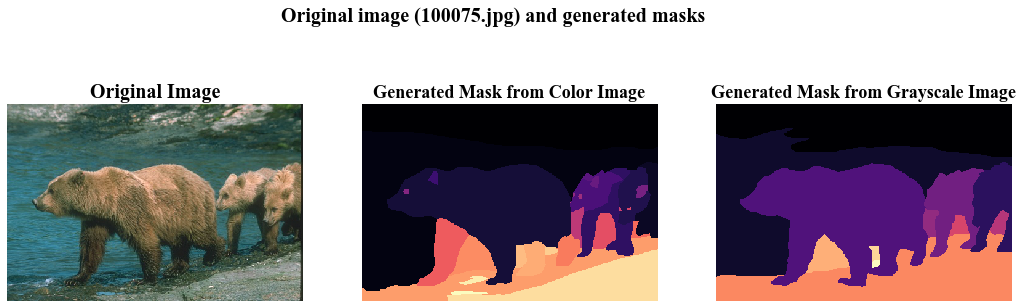

In [153]:
fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.imshow(I)
plt.title('Original Image', fontsize = 20)
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(np.asarray(ICM), cmap = 'magma')
plt.title('Generated Mask from Color Image', fontsize = 18)
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(np.asarray(IGM), cmap = 'magma')
plt.title('Generated Mask from Grayscale Image', fontsize = 18)
plt.axis('off')
plt.suptitle('Original image (100075.jpg) and generated masks', fontsize = 20)
plt.show()

# <span style='font-family:"Times New Roman"'> <span styel=''> Creating global consistency error and local consistency error functions

### <span style='font-family:"Times New Roman"'> <span styel=''>In this section, Global Consistency Error as well as Local Consistency Error measures based on an article by Martin et. al. [1] is defined. 


[1]. Martin, D., Fowlkes, C., Tal, D. and Malik, J., 2001, July. A database of human segmented natural images and its application to evaluating segmentation algorithms and measuring ecological statistics. In Proceedings Eighth IEEE International Conference on Computer Vision. ICCV 2001 (Vol. 2, pp. 416-423). IEEE.

## <span style='font-family:"Times New Roman"'> <span styel=''> (b-i) compute_GCE_LCE_loop Function:

In [12]:
def compute_GCE_LCE_loopy(Seg,GT):    #Comparing Segmentation File with Fround Truth File
    
    # using time to record running time of the function
    start_time = time.time()
    E1Final = []
    E2Final = []
    FinalMinforLCE = []
    
    # The martin paper definition loops over image's rows and columns
    # Hence, I am looping over rows and columns of image in this part 
    for r in range(0, Seg.shape[0]):
        for c in range(0, Seg.shape[1]):
            
            E1 = []
            E2 = []

            
            V1 = Seg[r,c]
            V2 = GT[r,c]
            
            R1 = np.zeros(Seg.shape)
            R2 = np.zeros(GT.shape)
            
            #Setting selected region to ones and other parts to zero:
            R1 = np.where(Seg == V1, 1, 0)
            R2 = np.where(GT == V2, 1, 0)
            
            #Defining Set Difference (R(S1; pi)\R(S2; pi)):
            setdiffS1 = np.where(((R1 == 1) & (R2 != 1)), 1, 0)
            
            #Defining Set Difference (R(S2; pi)\R(S1; pi)):
            setdiffS2 = np.where(((R2 == 1) & (R1 != 1)), 1, 0)
            
            #Local Refinement Error:
            E1 = np.sum(setdiffS1)/np.sum(R1)
            E2 = np.sum(setdiffS2)/np.sum(R2)
            
            E1Final = np.append(E1Final, E1)
            E2Final = np.append(E2Final, E2)
            
            minE1E2 = np.min([E1,E2])
            FinalMinforLCE = np.append(FinalMinforLCE, minE1E2)
            

    GCE = np.min([np.sum(E1Final),np.sum(E2Final)])/Seg.size
    LCE = np.sum(FinalMinforLCE)/Seg.size
              
    elapsed_time = time.time() - start_time
    return GCE,LCE,elapsed_time

## <span style='font-family:"Times New Roman"'> <span styel=''> (b-ii) Threshold Example Image:

### <span style='font-family:"Times New Roman"'> <span styel=''>In this part, we are going to segment an example image and calculate GCE and LCE values for it. 

In [13]:
#Converting an example color image to grayscale image
I_gray=skimage.color.rgb2gray(I)

In [14]:
#Thresholding the image at a value of: 127/255
I_gray_thresh = np.where(I_gray >= 127/255, 1, 0)

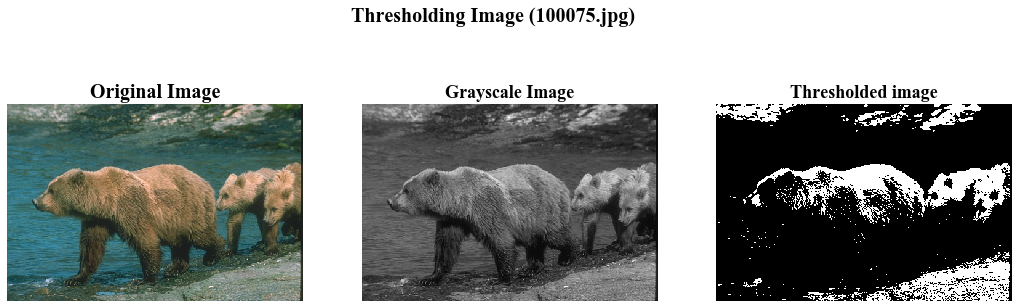

In [15]:
fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.imshow(I)
plt.title('Original Image', fontsize = 20)
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(I_gray, cmap = 'gray')
plt.title('Grayscale Image', fontsize = 18)
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(I_gray_thresh, cmap = 'gray')
plt.title('Thresholded image', fontsize = 18)
plt.axis('off')
plt.suptitle('Thresholding Image (100075.jpg)', fontsize = 20)
plt.show()

## <span style='font-family:"Times New Roman"'> <span styel=''> (b-iii) Determine Connected Components for Thresholded Image:

In [16]:
Seg = skimage.measure.label(I_gray_thresh)
# Generating segmentation image from threshold image 

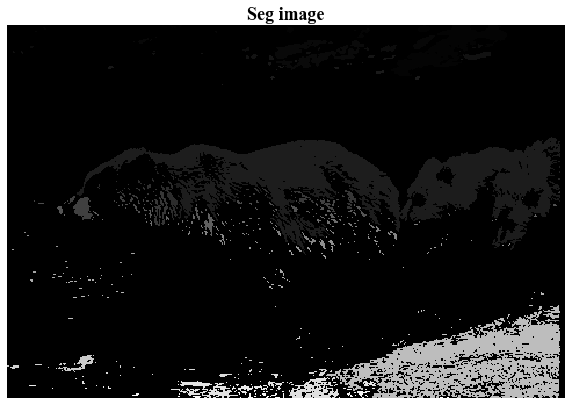

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(Seg, cmap = 'gray')
plt.title('Seg image', fontsize = 18)
plt.axis('off')
plt.show()

## <span style='font-family:"Times New Roman"'> <span styel=''>(b-iv) Compute GCE and LCE for Example Image:

In [18]:
GCE , LCE , Time= compute_GCE_LCE_loopy(Seg,np.array(IGM)[:,:,0])
print('GCE Value Using Loopy Code is:')
print(GCE)
print('LCE Value Using Loopy Code is:')
print(LCE)
print('Elapsed Time (Seconds):')
print(Time)

GCE Value Using Loopy Code is:
0.286380491958721
LCE Value Using Loopy Code is:
0.15611279539654216
Elapsed Time (Seconds):
282.44420170783997


## <span style='font-family:"Times New Roman"'> <span styel=''> (b-v) Verify GCE and LCE for compute_GCE_LCE Function:

### <span style='font-family:"Times New Roman"'> <span styel=''>In this section, I am verifying my GCE and LCE values using a code provided by instructor for the same image. 
### <span style='font-family:"Times New Roman"'> <span styel=''>The provided code is obfuscated, so first, I am de-obfuscating it and putting time measure in code to see how fast it is running, 


In [19]:
#def compute_GCE_LCE(UhBvybLpC1,UhBvybLpC2):
#    UhBvybLpCK=int
#    UhBvybLpCi=range
#    UhBvybLpCg=UhBvybLpC1.min()
#    UhBvybLpCx=UhBvybLpC1.max()
#    UhBvybLpCl=UhBvybLpC2.min()
#    UhBvybLpCe=UhBvybLpC2.max()
#    UhBvybLpCA=np.zeros((UhBvybLpCx+1,UhBvybLpCe+1),UhBvybLpCK)
#    for UhBvybLpC3 in UhBvybLpCi(UhBvybLpCg,UhBvybLpCx+1):
#        for UhBvybLpC4 in UhBvybLpCi(UhBvybLpCl,UhBvybLpCe+1):
#            UhBvybLpCA[UhBvybLpC3,UhBvybLpC4]=((UhBvybLpC1==UhBvybLpC3)&(UhBvybLpC2==UhBvybLpC4)).sum()
#    UhBvybLpCd=0
#    UhBvybLpCa=0
#    UhBvybLpCr=0
#    UhBvybLpCY=0
#    for UhBvybLpC3 in UhBvybLpCi(UhBvybLpCg,UhBvybLpCx+1):
#        for UhBvybLpC4 in UhBvybLpCi(UhBvybLpCl,UhBvybLpCe+1):
#            if UhBvybLpCA[UhBvybLpC3,UhBvybLpC4]>0:
#                UhBvybLpCk=(UhBvybLpCA[UhBvybLpC3,:].sum()-UhBvybLpCA[UhBvybLpC3,UhBvybLpC4]).astype('float')/(UhBvybLpCA[UhBvybLpC3,:].sum())
#                UhBvybLpCm=(UhBvybLpCA[:,UhBvybLpC4].sum()-UhBvybLpCA[UhBvybLpC3,UhBvybLpC4]).astype('float')/(UhBvybLpCA[:,UhBvybLpC4].sum())
#                UhBvybLpCd=UhBvybLpCd+UhBvybLpCk*UhBvybLpCA[UhBvybLpC3,UhBvybLpC4]
#                UhBvybLpCa=UhBvybLpCa+UhBvybLpCm*UhBvybLpCA[UhBvybLpC3,UhBvybLpC4]
#                UhBvybLpCr=UhBvybLpCr+np.minimum(UhBvybLpCk,UhBvybLpCm)*UhBvybLpCA[UhBvybLpC3,UhBvybLpC4]
#                UhBvybLpCY=UhBvybLpCY+UhBvybLpCA[UhBvybLpC3,UhBvybLpC4]
#    UhBvybLpCs=np.minimum(UhBvybLpCd,UhBvybLpCa)/(UhBvybLpCY)
#    UhBvybLpCr=UhBvybLpCr/(UhBvybLpCY)
#    return UhBvybLpCs,UhBvybLpCr
# Created by pyminifier (https://github.com/liftoff/pyminifier)


In [20]:
def compute_GCE_LCE(Seg,GT):
    start_time = time.time()
    SegMinIndex=Seg.min()
    SegMaxIndex=Seg.max()
    GTMinIndex=GT.min()
    GTMaxIndex=GT.max()
    n=np.zeros((SegMaxIndex+1,GTMaxIndex+1),int)
    for i in range(SegMinIndex,SegMaxIndex+1):
        for j in range(GTMinIndex,GTMaxIndex+1):
            n[i,j]=((Seg==i)&(GT==j)).sum()
    E1=0
    E2=0
    LCE=0
    N=0
    for i in range(SegMinIndex,SegMaxIndex+1):
        for j in range(GTMinIndex,GTMaxIndex+1):
            if n[i,j]>0:
                h=(n[i,:].sum()-n[i,j]).astype('float')/(n[i,:].sum())
                y=(n[:,j].sum()-n[i,j]).astype('float')/(n[:,j].sum())
                E1=E1+h*n[i,j]
                E2=E2+y*n[i,j]
                LCE=LCE+np.minimum(h,y)*n[i,j]
                N=N+n[i,j]
    GCE=np.minimum(E1,E2)/(N)
    LCE=LCE/(N)
    elapsed_time = time.time() - start_time
    return GCE,LCE,elapsed_time

In [21]:
GCE , LCE , Time= compute_GCE_LCE(Seg,np.array(IGM)[:,:,0])
print('GCE Value Using Obfuscated Code is :')
print(GCE)
print('LCE Value Using Obfuscated Code is :')
print(LCE)
print('Elapsed Time (Seconds):')
print(Time)

GCE Value Using Obfuscated Code is :
0.2863804919587235
LCE Value Using Obfuscated Code is :
0.1561127953965421
Elapsed Time (Seconds):
2.394591808319092


### <span style='font-family:"Times New Roman"'> <span styel=''>The code is looping over the segments instead of each pixel. The efficiency of provided code can be evaluated by comparing running time which is between two and three seconds on my computer compared to 286 seconds!

# <span style='font-family:"Times New Roman"'> <span styel=''> Evaluate SLIC Superpixel Segmentation:

### <span style='font-family:"Times New Roman"'> <span styel=''> In this section, I am going to evaluate SLIC superpixel performance introduced by Achanta et. al. [2] for segmentation. 

[2] Achanta, R., Shaji, A., Smith, K., Lucchi, A., Fua, P. and Süsstrunk, S., 2012. SLIC superpixels compared to state-of-the-art superpixel methods. IEEE transactions on pattern analysis and machine intelligence, 34(11), pp.2274-2282.

## <span style='font-family:"Times New Roman"'> <span styel=''>(c-i) SLIC Superpixels as Label Image:

### <span style='font-family:"Times New Roman"'> <span styel=''> Based on Achnta’s paper, number of segments is selected as 100 and compactness value is selected 10. I think `magma` color map visualizes different superpixels clearly. 

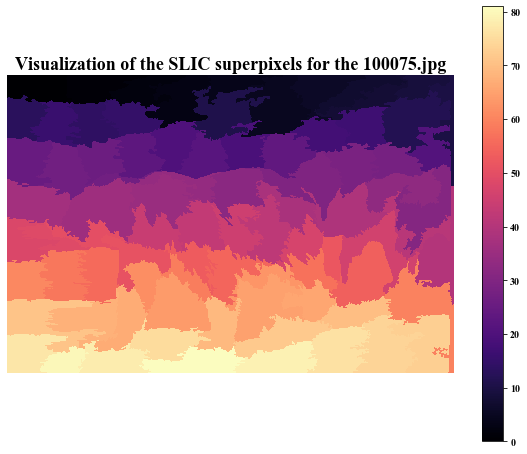

In [22]:
ISlic = skimage.segmentation.slic(I,n_segments=100,compactness=10)
plt.figure(figsize=(10,8))
plt.imshow(ISlic, cmap = 'magma')
plt.title('Visualization of the SLIC superpixels for the 100075.jpg', fontsize = 18)
plt.colorbar()
plt.axis('off')
plt.show()

In [23]:
GCE , LCE , elapsed_time = compute_GCE_LCE(ISlic,np.array(IGM)[:,:,0])
print('GCE Value Using Gray Mask is:')
print(GCE)
print('LCE Value Using Gray Mask is:')
print(LCE)
print('Elapsed Time (Seconds):')
print(elapsed_time)

GCE Value Using Gray Mask is:
0.16108578794954712
LCE Value Using Gray Mask is:
0.14919010883473122
Elapsed Time (Seconds):
0.37399888038635254


In [24]:
GCE , LCE , elapsed_time = compute_GCE_LCE(ISlic,np.array(ICM)[:,:,0])
print('GCE Value Using Color Mask is:')
print(GCE)
print('LCE Value Using Color Mask is:')
print(LCE)
print('Elapsed Time (Seconds):')
print(elapsed_time)

GCE Value Using Color Mask is:
0.20349771305427022
LCE Value Using Color Mask is:
0.18210706058859716
Elapsed Time (Seconds):
0.8636891841888428


## <span style='font-family:"Times New Roman"'> <span styel=''>(c-ii) SLIC Superpixels as Average Color:

### <span style='font-family:"Times New Roman"'> <span styel=''> The following function assigns each SLIC superpixel to have the average color of all pixels in original image within that superpixel.
### <span style='font-family:"Times New Roman"'> <span styel=''> The following code uses matrix indexing instead of looping over all individual pixels. 

In [25]:
def SLIC_avg_color(I,I_slic):
    ISMin = np.min(I_slic)    #Minimum value of I_slic
    ISMax = np.max(I_slic)    #Maximum Value of I_slic
    I_avg = np.zeros(I.shape) #Generating zeros matrix with image dimensions for faster compiling  
    NC = I.shape[2]           #Number of channels
    
    
    for i in range (ISMin,ISMax):   #Looping over number of superpixels
        
        #Looping over image's channels. So if we have a grayscale image,
        #it will have one channel and for color images, we will have three channels.
        #This part makes the code to be compatible for all kind of images. 
        for j in range (NC):   
            index_pos = np.where(I_slic == i)
            
            #Assigning average color values to corresponding SLIC superpixels:
            I_avg[index_pos[0],index_pos[1],j] = np.mean(I[index_pos[0],index_pos[1],j]) 
    return I_avg.astype('uint8')

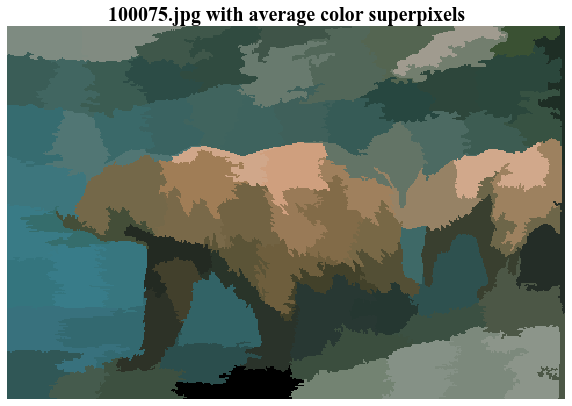

In [26]:
I_avg = SLIC_avg_color(I,ISlic)
plt.figure(figsize=(10,8))
plt.imshow(I_avg)
plt.title('100075.jpg with average color superpixels', fontsize = 20)
plt.axis('off')
plt.show()

## <span style='font-family:"Times New Roman"'> <span styel=''>(c-iii) SLIC Superpixel Performance:

In [27]:
image_directory = 'BSDS300-images\\BSDS300\\images\\test'
GT_Gray_directory = 'Masks\\Gray\\Test'
GT_Color_directory = 'Masks\\Color\\Test'
image_filenames = sorted(glob.glob(image_directory + '\\*.jpg'))
GTG_filenames = sorted(glob.glob(GT_Gray_directory + '\\*.png'))
GTC_filenames = sorted(glob.glob(GT_Color_directory + '\\*.png'))
GCEColorTotal = []
LCEColorTotal = []
GCEGrayTotal = []
LCEGrayTotal = []
start_time = time.time()
for f,image_filename in enumerate(image_filenames):
    image = image_filenames[f]
    GTG = GTG_filenames[f]
    GTC = GTC_filenames[f]
    TI = ((mpimg.imread(image)).astype(np.uint8))
    GTGray = (Image.open(GTG))
    GTColor = (Image.open(GTC))
    TISlic = skimage.segmentation.slic(TI,n_segments=100,compactness=10)
    GCEGray , LCEGray , Time = compute_GCE_LCE(TISlic,np.array(GTGray)[:,:,0])
    GCEGrayTotal = np.append(GCEGrayTotal, GCEGray)
    LCEGrayTotal = np.append(LCEGrayTotal, LCEGray)
    GCEColor , LCEColor, Time = compute_GCE_LCE(TISlic,np.array(GTColor)[:,:,0])
    GCEColorTotal = np.append(GCEColorTotal, GCEColor)
    LCEColorTotal = np.append(LCEColorTotal, LCEColor)
elapsed_time = time.time() - start_time

In [28]:
print('Elapsed Time (Seconds) :')
print(elapsed_time)
print('Mean of GCE Values for Color Mask with Respective Standard Deviation :')
print(str(np.mean(GCEColorTotal)), '+-' ,str(np.std(GCEColorTotal)))
print('Mean of LCE Values for Color Mask with Respective Standard Deviation :')
print(str(np.mean(LCEColorTotal)), '+-' ,str(np.std(LCEColorTotal)))
print('Mean of GCE Values for Gray Mask with Respective Standard Deviation :')
print(str(np.mean(GCEGrayTotal)), '+-' ,str(np.std(GCEGrayTotal)))
print('Mean of LCE Values for Gray Mask with Respective Standard Deviation :')
print(str(np.mean(LCEGrayTotal)), '+-' ,str(np.std(LCEGrayTotal)))  

Elapsed Time (Seconds) :
125.79788017272949
Mean of GCE Values for Color Mask with Respective Standard Deviation :
0.19498786030691087 +- 0.09609087808444322
Mean of LCE Values for Color Mask with Respective Standard Deviation :
0.16889929850574836 +- 0.07808025435890831
Mean of GCE Values for Gray Mask with Respective Standard Deviation :
0.18915935050382793 +- 0.09026589036873219
Mean of LCE Values for Gray Mask with Respective Standard Deviation :
0.16469494002663793 +- 0.06872626267961049


### <span style='font-family:"Times New Roman"'> <span styel=''> As claimed in Achanta paper, this algorithm is fast and memory efficient, segmenting 100 images in in almost 2 minutes which is exceptional. Also, since this algorithm has excellent boundary adherence, the resulting mean value for LCE and GCE as well as standard deviations are small. 

## <span style='font-family:"Times New Roman"'> <span styel=''>(c-iv) Best and Worst SLIC Performance:

### <span style='font-family:"Times New Roman"'> <span styel=''>In this section, best and worst SLIC performance as well as GCE and LCE values are reported.
### <span style='font-family:"Times New Roman"'> <span styel=''>For selecting best and worst, I have used global consistency error since it is a strict measure compared to local consistency measure. Also, since all the images are color images, I have used errors of color segmentation for my selections.   


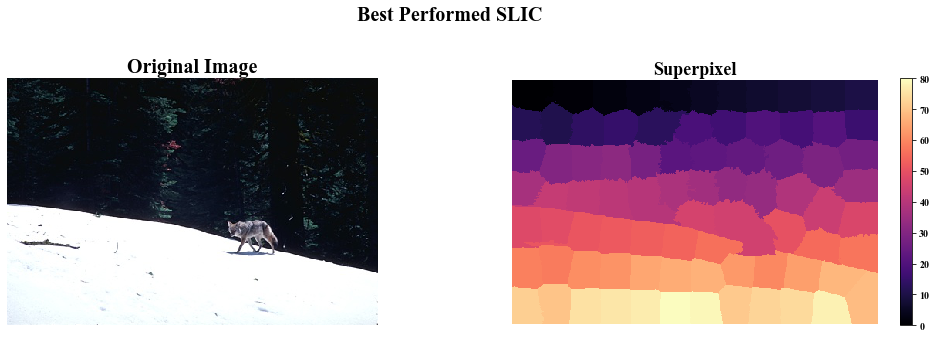

In [29]:
IBest = ((mpimg.imread(image_filenames[np.argmin(GCEColorTotal)])).astype(np.uint8))
BestSlic = skimage.segmentation.slic(IBest,n_segments=100,compactness=10)

fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
plt.imshow(IBest)
plt.title('Original Image', fontsize = 20)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(BestSlic, cmap = 'magma')
plt.colorbar()
plt.title('Superpixel', fontsize = 18)
plt.axis('off')
plt.suptitle('Best Performed SLIC', fontsize = 20)
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''>GCE and LCE Values for Best Performance of SLIC are reported in next section. The reported values are the smallest among calculated values indicating small magnitude of error.

In [30]:
print('GCE Value for Best Performance is:')
print(np.min(GCEColorTotal))
print('LCE Value for Best Performance is ')
print(np.min(LCEColorTotal))

GCE Value for Best Performance is:
0.02405496646347454
LCE Value for Best Performance is 
0.017394015969152608


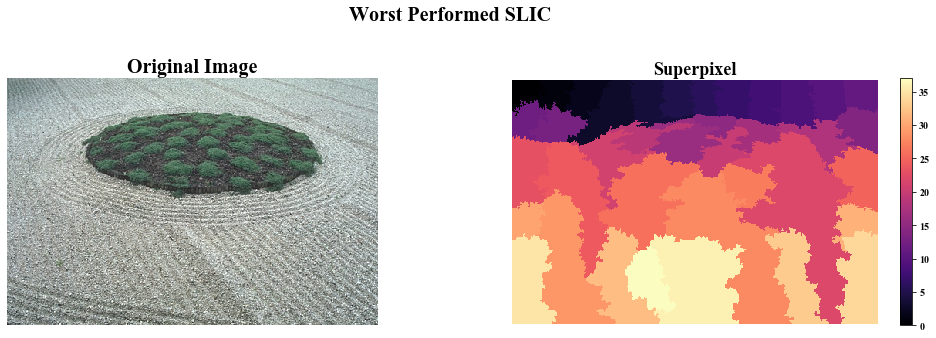

In [31]:
IWorst = ((mpimg.imread(image_filenames[np.argmax(GCEColorTotal)])).astype(np.uint8))
WorstSlic = skimage.segmentation.slic(IWorst,n_segments=100,compactness=10)

fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
plt.imshow(IWorst)
plt.title('Original Image', fontsize = 20)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(WorstSlic, cmap = 'magma')
plt.colorbar()
plt.title('Superpixel', fontsize = 18)
plt.axis('off')
plt.suptitle('Worst Performed SLIC', fontsize = 20)
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''>GCE and LCE Values for worst Performance of SLIC are reported in next section. The reported values are the largest among calculated values indicating large magnitude of error.  

In [32]:
print('GCE Value for Worst Performance is:')
print(np.max(GCEColorTotal))
print('LCE Value for Worst Performance is ')
print(np.max(LCEColorTotal))

GCE Value for Worst Performance is:
0.47273239105236486
LCE Value for Worst Performance is 
0.4121250611485029


### <span style='font-family:"Times New Roman"'> <span styel=''>SLIC uses two parameters: compactness and number of segments. The best segmented image has two regions, dark one and light one. The worst segmented image in contrary, has more uniform colors all over, and as it can see from color bar, the number of regions segmented image is small. Without doubt by increasing compactness, a better segmentation would be achieved.  

## <span style='font-family:"Times New Roman"'> <span styel=''>(c-v) Optimize SLIC Segmentation Performance:

In [33]:
image_directory = 'BSDS300-images\\BSDS300\\images\\Train'
GT_Color_directory = 'Masks\\Color\\Train'
GT_Gray_directory = 'Masks\\Gray\\Train'
image_filenames = sorted(glob.glob(image_directory + '\\*.jpg'))
GTC_filenames = sorted(glob.glob(GT_Color_directory + '\\*.png'))
GTG_filenames = sorted(glob.glob(GT_Gray_directory + '\\*.png'))
GCEColorTotal = []
LCEColorTotal = []
GCEGrayTotal = []
LCEGrayTotal = []

MeanGCEColor = []
MeanLCEColor = []
MeanGCEGray = []
MeanLCEGray = []

MeanStdGCEColor = []
MeanStdLCEColor = []
MeanStdGCEGray = []
MeanStdLCEGray = []

for m in range (1,25):
    for f,image_filename in enumerate(image_filenames):
        image = image_filenames[f]
        GTC = GTC_filenames[f]
        GTG = GTG_filenames[f]
        TI = ((mpimg.imread(image)).astype(np.uint8))
        GTColor = (Image.open(GTC))
        GTGray = (Image.open(GTG))
        TISlic = skimage.segmentation.slic(TI,n_segments=100,compactness=m)
        GCEColor , LCEColor, Time = compute_GCE_LCE(TISlic,np.array(GTColor)[:,:,0])
        GCEGray , LCEGray, Time = compute_GCE_LCE(TISlic,np.array(GTGray)[:,:,0])
        GCEColorTotal = np.append(GCEColorTotal, GCEColor)
        LCEColorTotal = np.append(LCEColorTotal, LCEColor)
        GCEGrayTotal = np.append(GCEGrayTotal, GCEGray)
        LCEGrayTotal = np.append(LCEGrayTotal, LCEGray)

        
    MeanGCEColor = np.append(MeanGCEColor, np.mean(GCEColorTotal))
    MeanLCEColor = np.append(MeanLCEColor, np.mean(LCEColorTotal))
    MeanGCEGray = np.append(MeanGCEGray, np.mean(GCEGrayTotal))
    MeanLCEGray = np.append(MeanLCEGray, np.mean(LCEGrayTotal))
    
    MeanStdGCEColor = np.append(MeanStdGCEColor, np.std(GCEColorTotal))
    MeanStdLCEColor = np.append(MeanStdLCEColor, np.std(LCEColorTotal))
    MeanStdGCEGray = np.append(MeanStdGCEGray, np.std(GCEGrayTotal))
    MeanStdLCEGray = np.append(MeanStdLCEGray, np.std(LCEGrayTotal))

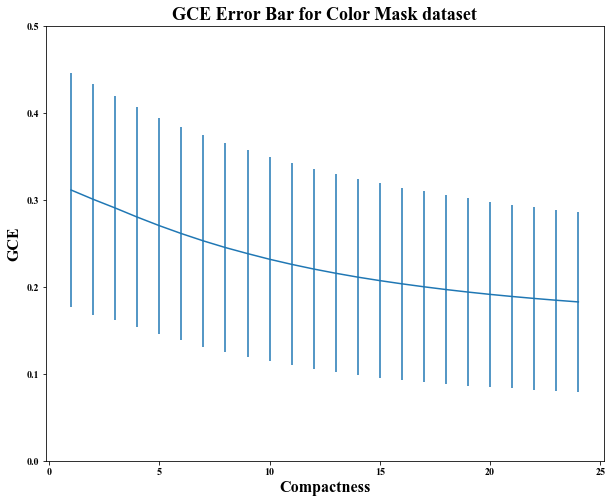

In [34]:
plt.figure(figsize=(10,8))
plt.errorbar(range (1,25),MeanGCEColor,yerr=MeanStdGCEColor)
plt.title('GCE Error Bar for Color Mask dataset', fontsize = 18)
plt.ylim(0,0.5)
plt.xlabel('Compactness', fontsize=16)
plt.ylabel('GCE', fontsize=16)
plt.show()

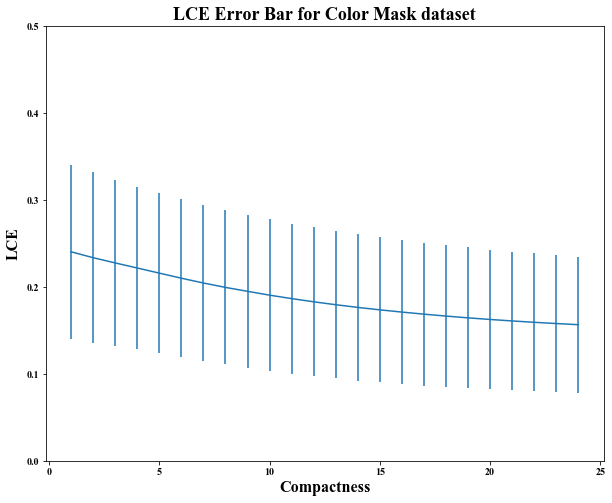

In [35]:
plt.figure(figsize=(10,8))
plt.errorbar(range (1,25),MeanLCEColor,yerr=MeanStdLCEColor)
plt.title('LCE Error Bar for Color Mask dataset', fontsize = 18)
plt.ylim(0,0.5)
plt.xlabel('Compactness', fontsize=16)
plt.ylabel('LCE', fontsize=16)
plt.show()

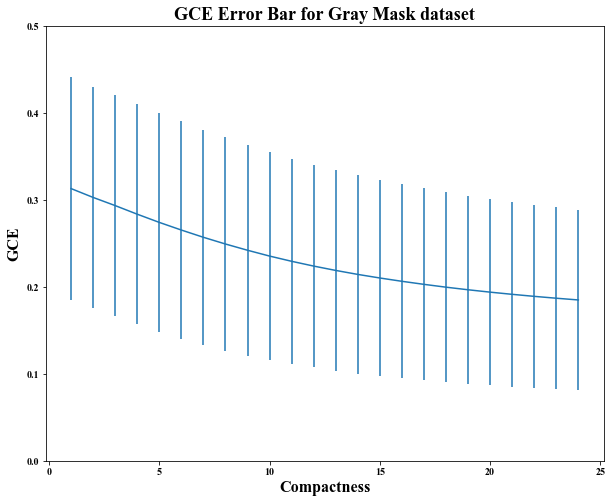

In [36]:
plt.figure(figsize=(10,8))
plt.errorbar(range (1,25),MeanGCEGray,yerr=MeanStdGCEGray)
plt.title('GCE Error Bar for Gray Mask dataset', fontsize = 18)
plt.ylim(0,0.5)
plt.xlabel('Compactness', fontsize=16)
plt.ylabel('GCE', fontsize=16)
plt.show()

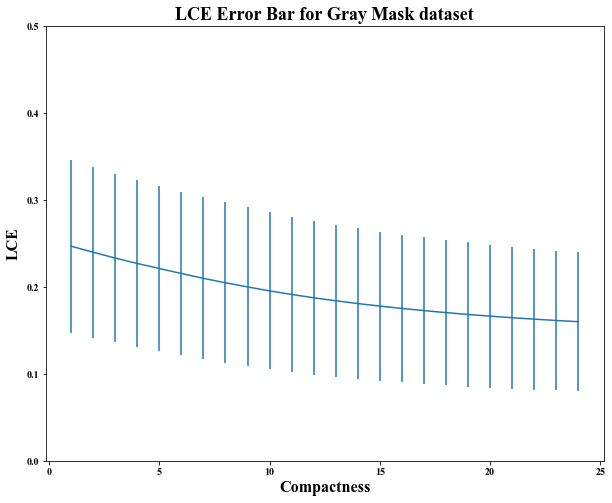

In [37]:
plt.figure(figsize=(10,8))
plt.errorbar(range (1,25),MeanLCEGray,yerr=MeanStdLCEGray)
plt.title('LCE Error Bar for Gray Mask dataset', fontsize = 18)
plt.ylim(0,0.5)
plt.xlabel('Compactness', fontsize=16)
plt.ylabel('LCE', fontsize=16)
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> The compactness value for optimized performance is considered as 20, since according to error plots, after 20, the decrease in error level is not significant.

In [38]:
image_directory = 'BSDS300-images\\BSDS300\\images\\test'
GT_Gray_directory = 'Masks\\Gray\\Test'
GT_Color_directory = 'Masks\\Color\\Test'
image_filenames = sorted(glob.glob(image_directory + '\\*.jpg'))
GTG_filenames = sorted(glob.glob(GT_Gray_directory + '\\*.png'))
GTC_filenames = sorted(glob.glob(GT_Color_directory + '\\*.png'))
GCEColorTotal = []
LCEColorTotal = []
GCEGrayTotal = []
LCEGrayTotal = []
start_time = time.time()
for f,image_filename in enumerate(image_filenames):
    image = image_filenames[f]
    GTG = GTG_filenames[f]
    GTC = GTC_filenames[f]
    TI = ((mpimg.imread(image)).astype(np.uint8))
    GTGray = (Image.open(GTG))
    GTColor = (Image.open(GTC))
    TISlic = skimage.segmentation.slic(TI,n_segments=100,compactness=20)
    GCEGray , LCEGray , Time = compute_GCE_LCE(TISlic,np.array(GTGray)[:,:,0])
    GCEGrayTotal = np.append(GCEGrayTotal, GCEGray)
    LCEGrayTotal = np.append(LCEGrayTotal, LCEGray)
    GCEColor , LCEColor, Time = compute_GCE_LCE(TISlic,np.array(GTColor)[:,:,0])
    GCEColorTotal = np.append(GCEColorTotal, GCEColor)
    LCEColorTotal = np.append(LCEColorTotal, LCEColor)
elapsed_time = time.time() - start_time

In [39]:
print('Elapsed Time (Seconds) :')
print(elapsed_time)
print('Mean of GCE Values for Color Mask with Respective Standard Deviation :')
print(str(np.mean(GCEColorTotal)), '+-' ,str(np.std(GCEColorTotal)))
print('Mean of LCE Values for Color Mask with Respective Standard Deviation :')
print(str(np.mean(LCEColorTotal)), '+-' ,str(np.std(LCEColorTotal)))
print('Mean of GCE Values for Gray Mask with Respective Standard Deviation :')
print(str(np.mean(GCEGrayTotal)), '+-' ,str(np.std(GCEGrayTotal)))
print('Mean of LCE Values for Gray Mask with Respective Standard Deviation :')
print(str(np.mean(LCEGrayTotal)), '+-' ,str(np.std(LCEGrayTotal)))  

Elapsed Time (Seconds) :
160.67628169059753
Mean of GCE Values for Color Mask with Respective Standard Deviation :
0.15367456377069966 +- 0.0782965220752891
Mean of LCE Values for Color Mask with Respective Standard Deviation :
0.1384518491608078 +- 0.0678890866391597
Mean of GCE Values for Gray Mask with Respective Standard Deviation :
0.14665617595961966 +- 0.06924061330975446
Mean of LCE Values for Gray Mask with Respective Standard Deviation :
0.13385307603636173 +- 0.057860681417579655


### <span style='font-family:"Times New Roman"'> <span styel=''> In the same fashion as section (c-iv), for displaying best and worst performance of the optimized SLIC superpixel, GCE value for color segmentation is considered. 

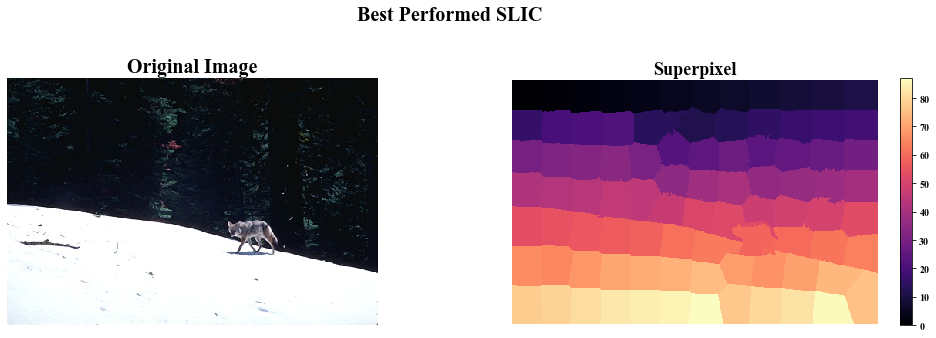

In [40]:
IBest = ((mpimg.imread(image_filenames[np.argmin(GCEColorTotal)])).astype(np.uint8))
BestSlic = skimage.segmentation.slic(IBest,n_segments=100,compactness=20)

fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
plt.imshow(IBest)
plt.title('Original Image', fontsize = 20)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(BestSlic, cmap = 'magma')
plt.colorbar()
plt.title('Superpixel', fontsize = 18)
plt.axis('off')
plt.suptitle('Best Performed SLIC', fontsize = 20)
plt.show()

In [41]:
print('GCE Value for Best Performance is:')
print(np.min(GCEColorTotal))
print('LCE Value for Best Performance is ')
print(np.min(LCEColorTotal))

GCE Value for Best Performance is:
0.018714140982604762
LCE Value for Best Performance is 
0.017464945826425642


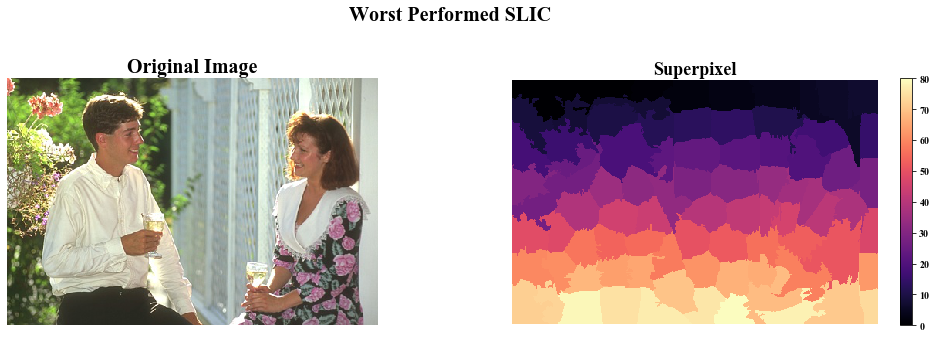

In [42]:
IWorst = ((mpimg.imread(image_filenames[np.argmax(GCEColorTotal)])).astype(np.uint8))
WorstSlic = skimage.segmentation.slic(IWorst,n_segments=100,compactness=20)

fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
plt.imshow(IWorst)
plt.title('Original Image', fontsize = 20)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(WorstSlic, cmap = 'magma')
plt.colorbar()
plt.title('Superpixel', fontsize = 18)
plt.axis('off')
plt.suptitle('Worst Performed SLIC', fontsize = 20)
plt.show()

In [43]:
print('GCE Value for Worst Performance is:')
print(np.max(GCEColorTotal))
print('LCE Value for Worst Performance is ')
print(np.max(LCEColorTotal))

GCE Value for Worst Performance is:
0.4076156028286143
LCE Value for Worst Performance is 
0.36574375478606247


### <span style='font-family:"Times New Roman"'> <span styel=''>It was expected that by optimizing compactness value, all the error values decrease too. It is the case in all the cases in this section. Same discussion holds here too. The best segmented image still the same image before optimization, but worst segmented image is a complex image (more color variations). Increasing number of segments can improve the segmentation pf this image. 

# <span style='font-family:"Times New Roman"'> <span styel=''>(d) Active Contours (Snakes)

### <span style='font-family:"Times New Roman"'> <span styel=''> In this part of the project, we will use the ellipse image (Figure 11.2 in [3]) to investigate the segmentation performance of the snake algorithm.
<span style='font-family:"Times New Roman"'> <span styel=''> [3] Gonzalez, Rafael C., Richard Eugene Woods, and Steven L. Eddins. Digital image processing using MATLAB. Pearson Education India, 2004. 


## <span style='font-family:"Times New Roman"'> <span styel=''>(d-i) Active Contour Segmentation:

In [119]:
I = mpimg.imread('elliptical-object-noisy.tif') #Reading Image to variable I

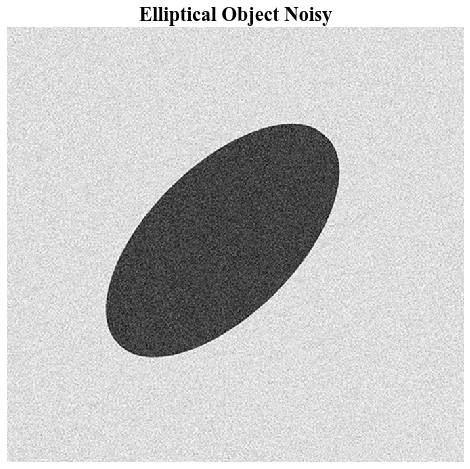

In [120]:
plt.figure(figsize=(10,8))
plt.imshow(I, cmap = 'gray')
plt.title('Elliptical Object Noisy', fontsize = 20)
plt.axis('off')
plt.show()

In [121]:
Nr, Nc = I.shape
k = 125
init_snake = np.block([[k*np.ones(Nc-2*k),\
np.asarray(range(k,Nr-2*k)), Nr-k*np.ones(Nc-2*k),\
np.asarray(range(Nr-k,k,-1))], [np.asarray(range(k,Nc-2*k)),\
Nc-k*np.ones(Nr-2*k),np.asarray(range(Nc-k,k,-1)),\
k*np.ones(Nr-2*k)]]).T

In [122]:
final_snake = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=0.006,max_iterations=500,coordinates='rc')

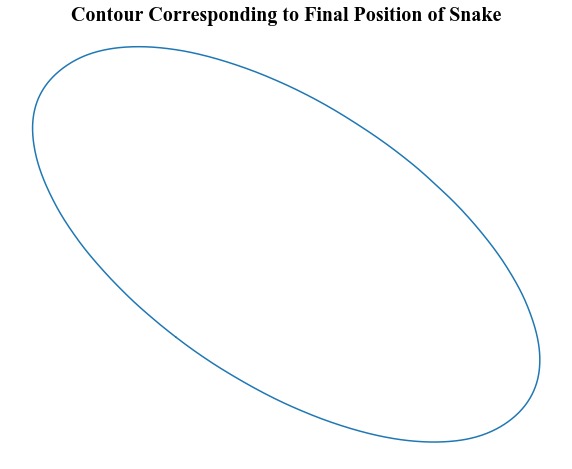

In [123]:
plt.figure(figsize=(10,8))
plt.plot(final_snake[:,1],final_snake[:,0])
plt.title('Contour Corresponding to Final Position of Snake', fontsize = 20)
plt.axis('off')
plt.show()

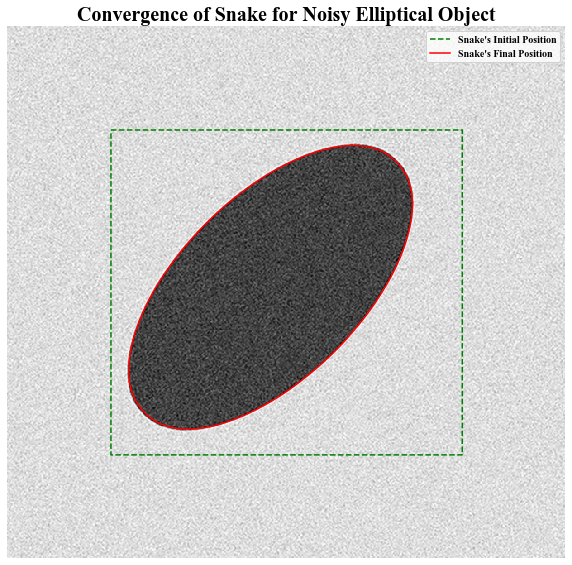

In [124]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(I, cmap = 'gray')
ax.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title('Convergence of Snake for Noisy Elliptical Object', fontsize = 20)
plt.legend(loc="upper right")
plt.axis('off')
plt.show()

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-ii) Evolution of the Active Contour:

In [50]:
final_snake100 = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=0.006,max_iterations=100,coordinates='rc')
final_snake200 = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=0.006,max_iterations=200,coordinates='rc')
final_snake300 = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=0.006,max_iterations=300,coordinates='rc')
final_snake400 = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=0.006,max_iterations=400,coordinates='rc')
final_snake500 = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=0.006,max_iterations=500,coordinates='rc')

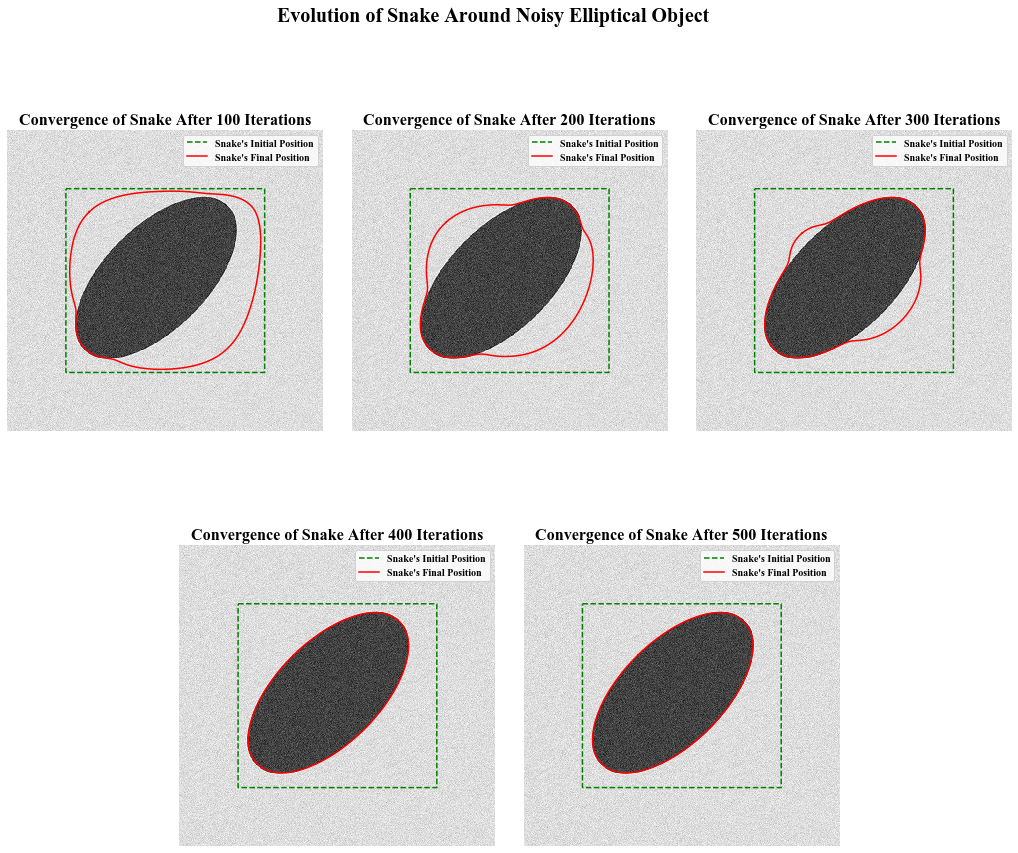

In [51]:
fig = plt.subplots(figsize=(18, 14))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax1.imshow(I, cmap = 'gray')
ax1.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax1.plot(final_snake100[:,1],final_snake100[:,0], color='red', label="Snake's Final Position")
plt.title('Convergence of Snake After 100 Iterations', fontsize = 16)
plt.legend(loc="upper right")
plt.axis('off')
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2.imshow(I, cmap = 'gray')
ax2.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax2.plot(final_snake200[:,1],final_snake200[:,0], color='red', label="Snake's Final Position")
plt.title('Convergence of Snake After 200 Iterations', fontsize = 16)
plt.legend(loc="upper right")
plt.axis('off')
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3.imshow(I, cmap = 'gray')
ax3.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax3.plot(final_snake300[:,1],final_snake300[:,0], color='red', label="Snake's Final Position")
plt.title('Convergence of Snake After 300 Iterations', fontsize = 16)
plt.legend(loc="upper right")
plt.axis('off')
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4.imshow(I, cmap = 'gray')
ax4.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax4.plot(final_snake400[:,1],final_snake400[:,0], color='red', label="Snake's Final Position")
plt.title('Convergence of Snake After 400 Iterations', fontsize = 16)
plt.legend(loc="upper right")
plt.axis('off')
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax5.imshow(I, cmap = 'gray')
ax5.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax5.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title('Convergence of Snake After 500 Iterations', fontsize = 16)
plt.legend(loc="upper right")
plt.axis('off')
plt.suptitle('Evolution of Snake Around Noisy Elliptical Object', fontsize = 20)
plt.show()


## <span style='font-family:"Times New Roman"'> <span styel=''>(d-iii) Sensitivity of Active Contours to Parameters:

### <span style='font-family:"Times New Roman"'> <span styel=''> In this section, the effect of parameter choice on the speed of convergence as well as final shape of snake would be investigated.  

In [125]:
final_snake = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.1,beta=0,gamma=0.006,max_iterations=500,coordinates='rc')

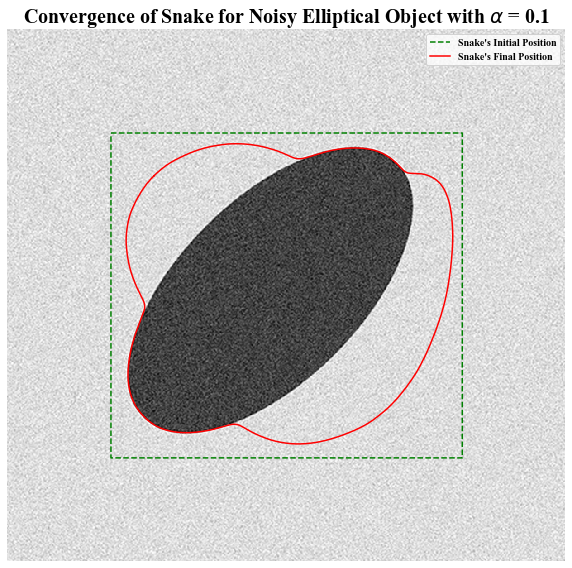

In [126]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(I, cmap = 'gray')
ax.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title(r'Convergence of Snake for Noisy Elliptical Object with $\alpha$ = 0.1', fontsize = 20)
plt.legend(loc="upper right")
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> Setting $\alpha$ to 0.1 decrease the speed of convergence. As it is seen in figure, after 500 iterations, the snake has not converged yet (compare it with section d-ii with 200 iterations). $\alpha$ is a constant (can be a function too) that controls the elastic energy of the contour. So small value for $\alpha$ would yield to small vale for average elastic energy. The generated force is week for pushing snake to boundaries. Hence number of iterations should increase for successful convergence.

In [127]:
final_snake = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.1,beta=0,gamma=0.006,max_iterations=1000,coordinates='rc')

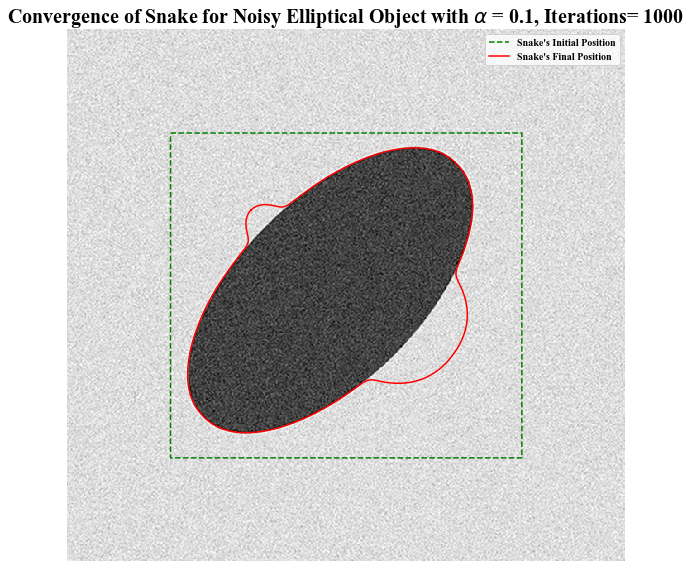

In [128]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(I, cmap = 'gray')
ax.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title(r'Convergence of Snake for Noisy Elliptical Object with $\alpha$ = 0.1, Iterations= 1000', fontsize = 20)
plt.legend(loc="upper right")
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> By increasing iteration while keeping $\alpha$ the same, the satisfactory convergence would be achievable. 

In [54]:
final_snake = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=5,beta=0,gamma=0.006,max_iterations=500,coordinates='rc')

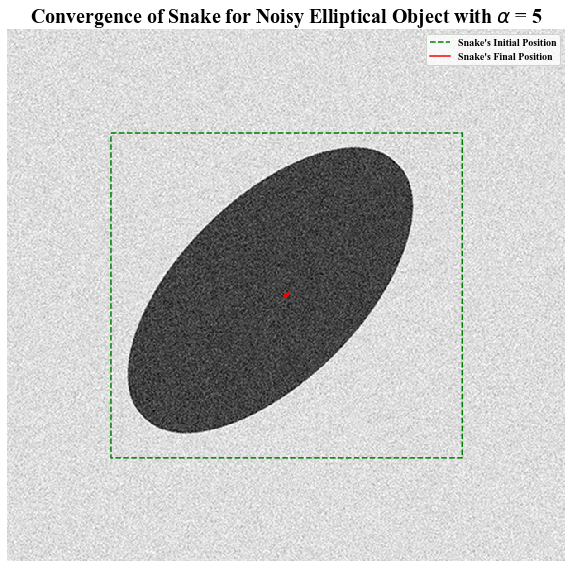

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(I, cmap = 'gray')
ax.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title(r'Convergence of Snake for Noisy Elliptical Object with $\alpha$ = 5', fontsize = 20)
plt.legend(loc="upper right")
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> By setting $\beta$ to zero and $\alpha$ to 5, the curve is converged unfavorably. As it is discussed before, $\alpha$ controls elastic energy and beta controls bending of the curve, and consequently these parameters are affecting internal energy of the snake.  
### <span style='font-family:"Times New Roman"'> <span styel=''>From the figure, it seems like generated force for pushing the snake is too much, hence it missed the boundaries of the image to boundaries of group of noise (since the image has noise.) Also, the snake is done evolving. 


In [56]:
final_snake = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=1,gamma=0.006,max_iterations=500,coordinates='rc')

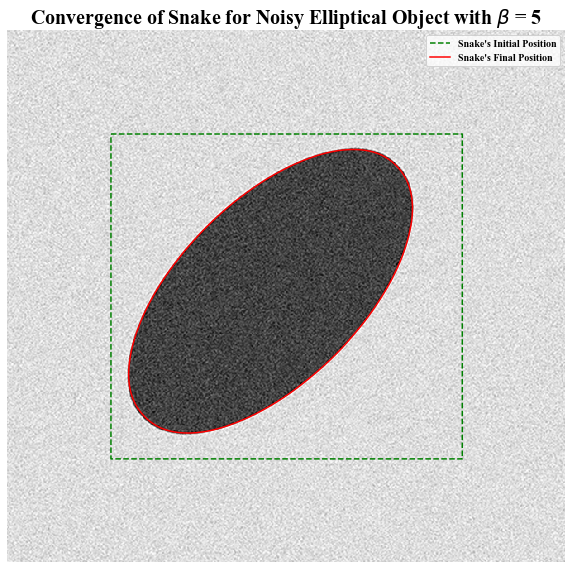

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(I, cmap = 'gray')
ax.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title(r'Convergence of Snake for Noisy Elliptical Object with $\beta$ = 1', fontsize = 20)
plt.legend(loc="upper right")
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''>By setting $\beta$ to one and $\alpha$ to 0.5, the curve is converged favorably. Meaning that the selected parameters have generated a suitable force to push snake to boundaries of the image with selected iterations. 

In [58]:
final_snake = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=0.6,max_iterations=500,coordinates='rc')

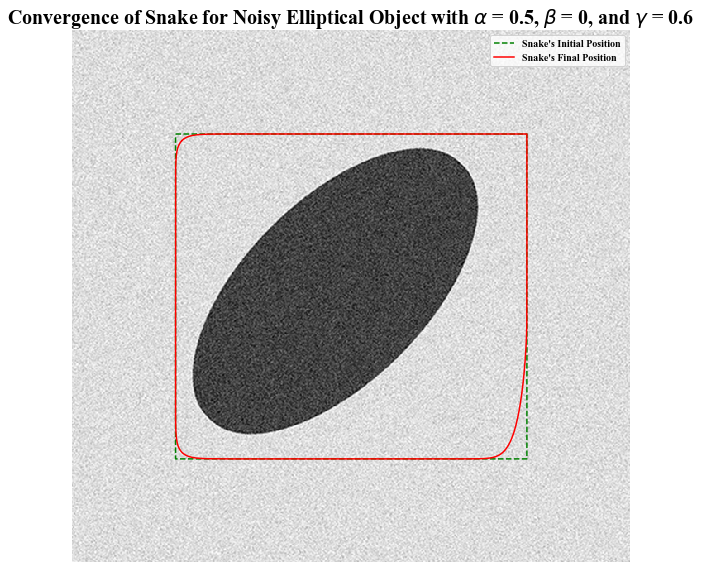

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(I, cmap = 'gray')
ax.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title(r'Convergence of Snake for Noisy Elliptical Object with $\alpha$ = 0.5, $\beta$ = 0, and $\gamma$ = 0.6',\
          fontsize = 20)
plt.legend(loc="upper right")
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> $\gamma$ controls the external force. By setting $\gamma$ to 0.6 while keeping $\alpha$ at 0.5 and $\beta$ at 0, the algorithm does not generate enough force to push the snake to boundaries of the object. As it is observable from the figure, the snake has barely moved from its initial condition. 

In [60]:
final_snake = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=6e-6,max_iterations=500,coordinates='rc')

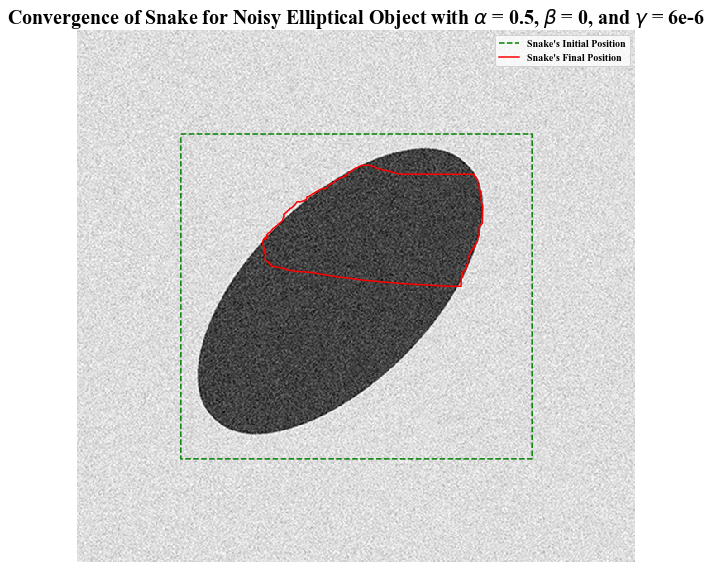

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(I, cmap = 'gray')
ax.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title(r'Convergence of Snake for Noisy Elliptical Object with $\alpha$ = 0.5, $\beta$ = 0, and $\gamma$ = 6e-6',\
          fontsize = 20)
plt.legend(loc="upper right")
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> By setting $\alpha$ = 0.5, $\beta$ = 0, and $\gamma$ = 6e-6, the effect of pulling force for snake would be less than its pushing force. As a result, the snake is missed the boundaries of the object and the convergence is not successful. 

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-iv) Sensitivity of Active Contours to Snake Initialization:

### <span style='font-family:"Times New Roman"'> <span styel=''>This section investigates the initial position of the snake in final convergence of it. Good initialization is essential for accurate convergence of the snake algorithm. 

In [62]:
Nr, Nc = I.shape
k = 10
init_snake = np.block([[k*np.ones(Nc-2*k),\
np.asarray(range(k,Nr-2*k)), Nr-k*np.ones(Nc-2*k),\
np.asarray(range(Nr-k,k,-1))], [np.asarray(range(k,Nc-2*k)),\
Nc-k*np.ones(Nr-2*k),np.asarray(range(Nc-k,k,-1)),\
k*np.ones(Nr-2*k)]]).T

In [63]:
final_snake = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=0.006,max_iterations=500,coordinates='rc')

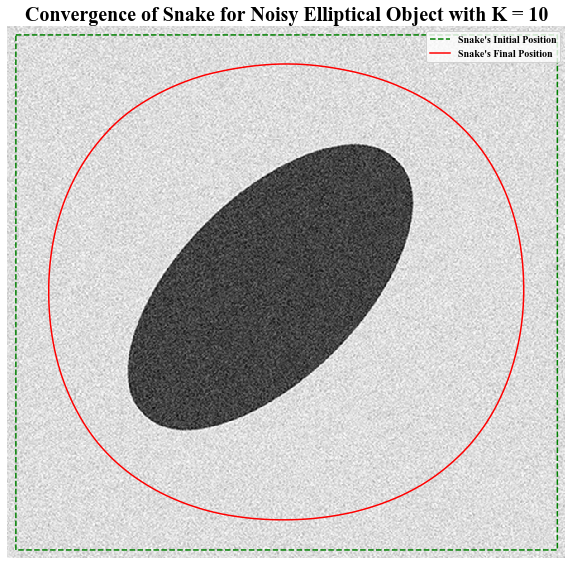

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(I, cmap = 'gray')
ax.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title('Convergence of Snake for Noisy Elliptical Object with K = 10', fontsize = 20)
plt.legend(loc="upper right")
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> The regions all over the initial boundary is so far from the force field that the forces were unable to act on that region. Furthermore, this initialization will generate more pulling force compared to pushing force and as a result, the convergence is not achieved. Also, since the image has significant amount of noise, it would cause the snake to has ununiform force field and hence, the snake algorithm fails to detect boundaries as expected in selected number of iterations. 

In [65]:
Nr, Nc = I.shape
k = 175
init_snake = np.block([[k*np.ones(Nc-2*k),\
np.asarray(range(k,Nr-2*k)), Nr-k*np.ones(Nc-2*k),\
np.asarray(range(Nr-k,k,-1))], [np.asarray(range(k,Nc-2*k)),\
Nc-k*np.ones(Nr-2*k),np.asarray(range(Nc-k,k,-1)),\
k*np.ones(Nr-2*k)]]).T

In [66]:
final_snake = skimage.segmentation.active_contour(skimage.filters.gaussian(I,5),\
            init_snake,alpha=0.5,beta=0,gamma=0.006,max_iterations=500,coordinates='rc')

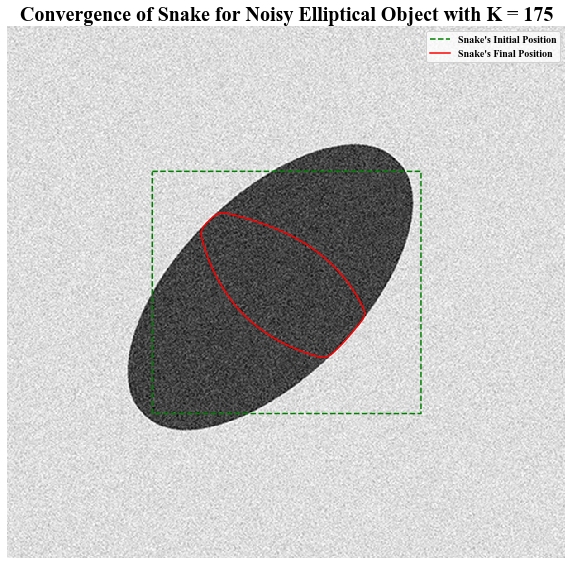

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(I, cmap = 'gray')
ax.plot(init_snake[:,1],init_snake[:,0], '--', color='green', label="Snake's Initial Position")
ax.plot(final_snake[:,1],final_snake[:,0], color='red', label="Snake's Final Position")
plt.title('Convergence of Snake for Noisy Elliptical Object with K = 175', fontsize = 20)
plt.legend(loc="upper right")
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> The generated pushing force field is much bigger than pulling force field. Hence, the convergence has not achieved because the region inside the object is much larger than surrounding area due to bad initialization. 

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-v) Optimization of Active Contours for a Dataset:

### <span style='font-family:"Times New Roman"'> <span styel=''>Implementing active snake algorithm depends on 4 different parameters. Alpha, beta, gamma, and initial position. There are no concrete rules of how to select these parameters. Although, initialization can be automatic too, it will require more computation effort. Furthermore, what happened in part d was an active snake algorithm for segmentation of one object boundaries. 
### <span style='font-family:"Times New Roman"'> <span styel=''>Implementing the active snake algorithm on BSDS successfully should be a difficult task. First, the images associated with this dataset have different segments. So, based on images condition, the number of snakes should be tuned. Also, based on each image, the position of these snakes should be changed too. Finally, for each individual image, alpha, beta, and gamma values must be modified. This makes implantation of active snake algorithm a cumbersome task.    


# <span style='font-family:"Times New Roman"'> <span styel=''>(e) Active Contours Without Edges (ACWE)

### <span style='font-family:"Times New Roman"'> <span styel=''>The ACWE algorithm is designed to work on grayscale images. Hence, all the images here would be converted to grayscale images before implementing ACWE algorithm. 

## <span style='font-family:"Times New Roman"'> <span styel=''>(e-i) ACWE Segmentation:

In [68]:
I = ((mpimg.imread('BSDS300-images\\BSDS300\\images\\train\\100075.jpg')).astype(np.uint8))
I_gray=skimage.color.rgb2gray(I)   #Converting color image to grayscale image

In [69]:
I_acwe, phi, energies = skimage.segmentation.chan_vese(I_gray,mu=0.01,tol\
=1e-3,max_iter=500,init_level_set='checkerboard',extended_output=True)

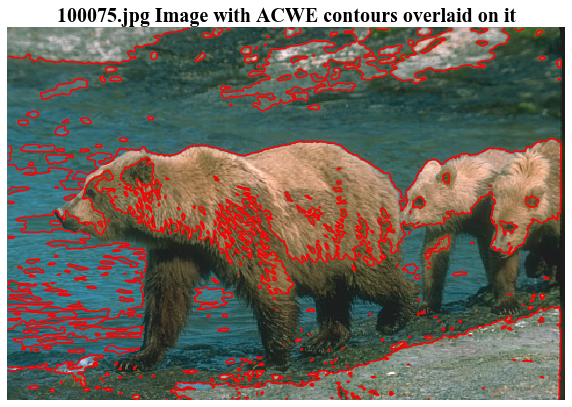

In [70]:
fig = plt.subplots(figsize=(10, 8))
plt.imshow(I)
plt.contour(phi,0,colors = 'red')
plt.title('100075.jpg Image with ACWE contours overlaid on it', fontsize = 20)
plt.axis('off')
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> For calculating GCE and LCE, ACWE segmentation should be converted to label matrix. 

In [71]:
Seg = skimage.measure.label(I_acwe)

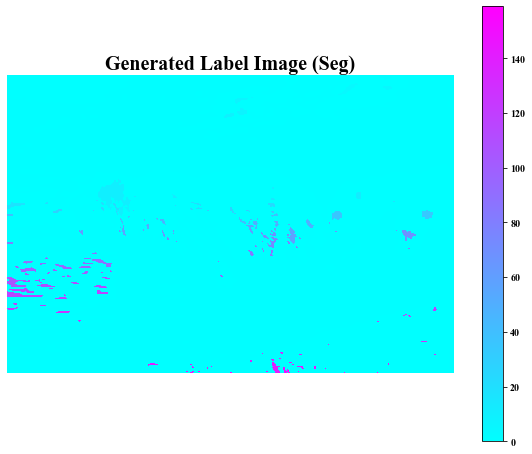

In [72]:
fig = plt.subplots(figsize=(10, 8))
plt.imshow(Seg, cmap = 'cool')
plt.colorbar()
plt.title('Generated Label Image (Seg)', fontsize = 20)
plt.axis('off')
plt.show()

In [73]:
GCEColorBear , LCEColorBear, Time = compute_GCE_LCE(Seg,np.array(ICM)[:,:,0])
print('Elapsed Time :')
print(Time)
print('GCE Value for Color Mask is :')
print(GCEColorBear)
print('LCE Value for Color Mask is :')
print(LCEColorBear)

Elapsed Time :
1.7433624267578125
GCE Value for Color Mask is :
0.36414226817701106
LCE Value for Color Mask is :
0.34707608099223014


In [74]:
GCEGrayBear , LCEGrayBear, Time = compute_GCE_LCE(Seg,np.array(IGM)[:,:,0])
print('Elapsed Time :')
print(Time)
print('GCE Value for Gray Mask is :')
print(GCEGrayBear)
print('LCE Value for Gray Mask is :')
print(LCEGrayBear)

Elapsed Time :
0.7589397430419922
GCE Value for Gray Mask is :
0.4805731340933004
LCE Value for Gray Mask is :
0.4604026548538293


## <span style='font-family:"Times New Roman"'> <span styel=''>(e-ii) ACWE Segmentation as Average Color Regions:

### <span style='font-family:"Times New Roman"'> <span styel=''>For generating ACWE Segmentation as average color region, previously defined function without any changes has been used:

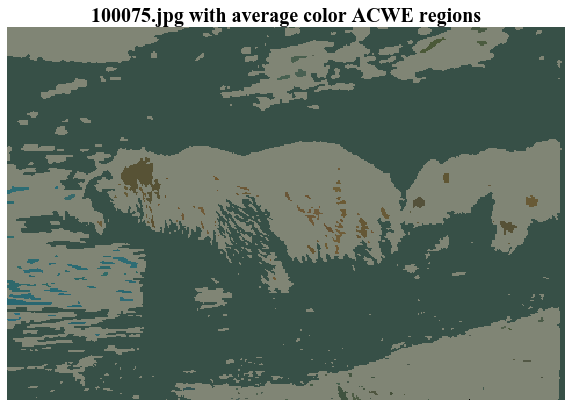

In [75]:
I_avg_acwe = SLIC_avg_color(I,Seg)
plt.figure(figsize=(10,8))
plt.imshow(I_avg_acwe)
plt.title('100075.jpg with average color ACWE regions', fontsize = 20)
plt.axis('off')
plt.show()

## <span style='font-family:"Times New Roman"'> <span styel=''>(e-iii) ACWE Segmentation Performance:

In [113]:
image_directory = 'BSDS300-images\\BSDS300\\images\\test'
GT_Gray_directory = 'Masks\\Gray\\Test'
GT_Color_directory = 'Masks\\Color\\Test'
image_filenames = sorted(glob.glob(image_directory + '\\*.jpg'))
GTG_filenames = sorted(glob.glob(GT_Gray_directory + '\\*.png'))
GTC_filenames = sorted(glob.glob(GT_Color_directory + '\\*.png'))
GCEColorTotal = []
LCEColorTotal = []
GCEGrayTotal = []
LCEGrayTotal = []
start_time = time.time()
for f,image_filename in enumerate(image_filenames):
    image = image_filenames[f]
    GTG = GTG_filenames[f]
    GTC = GTC_filenames[f]
    TI = ((mpimg.imread(image)).astype(np.uint8))
    I_gray=skimage.color.rgb2gray(TI)
    I_acwe, phi, energies = skimage.segmentation.chan_vese(I_gray,mu=0.01,tol\
    =1e-3,max_iter=500,init_level_set='checkerboard',extended_output=True)
    Seg = skimage.measure.label(I_acwe)
    GTGray = (Image.open(GTG))
    GTColor = (Image.open(GTC))
    GCEGray , LCEGray , Time = compute_GCE_LCE(Seg,np.array(GTGray)[:,:,0])
    GCEGrayTotal = np.append(GCEGrayTotal, GCEGray)
    LCEGrayTotal = np.append(LCEGrayTotal, LCEGray)
    GCEColor , LCEColor, Time = compute_GCE_LCE(Seg,np.array(GTColor)[:,:,0])
    GCEColorTotal = np.append(GCEColorTotal, GCEColor)
    LCEColorTotal = np.append(LCEColorTotal, LCEColor)
elapsed_time = time.time() - start_time

In [114]:
print('Elapsed Time (Minutes) :')
print(elapsed_time/60)
print('Mean of GCE Values for Color Mask with Respective Standard Deviation :')
print(str(np.mean(GCEColorTotal)), '+-' ,str(np.std(GCEColorTotal)))
print('Mean of LCE Values for Color Mask with Respective Standard Deviation :')
print(str(np.mean(LCEColorTotal)), '+-' ,str(np.std(LCEColorTotal)))
print('Mean of GCE Values for Gray Mask with Respective Standard Deviation :')
print(str(np.mean(GCEGrayTotal)), '+-' ,str(np.std(GCEGrayTotal)))
print('Mean of LCE Values for Gray Mask with Respective Standard Deviation :')
print(str(np.mean(LCEGrayTotal)), '+-' ,str(np.std(LCEGrayTotal)))  

Elapsed Time (Minutes) :
66.97727744579315
Mean of GCE Values for Color Mask with Respective Standard Deviation :
0.26762235771986975 +- 0.12678362067888885
Mean of LCE Values for Color Mask with Respective Standard Deviation :
0.20894376343671214 +- 0.10367936810661701
Mean of GCE Values for Gray Mask with Respective Standard Deviation :
0.27987884675844454 +- 0.12387225864700782
Mean of LCE Values for Gray Mask with Respective Standard Deviation :
0.21900137740016756 +- 0.10336920306487059


### <span style='font-family:"Times New Roman"'> <span styel=''> Comparing these results with SLIC super performance can yield two important conclusions:
### <span style='font-family:"Times New Roman"'> <span styel=''> 1)	SLIC superpixel implementation is considerably fast.
### <span style='font-family:"Times New Roman"'> <span styel=''> 2)	Segmentation based on SLIC superpixel result in less GCE and LCE meaning that the performance of SLIC is better than ACWE Segmentation in light of GCE and LCE. 


## <span style='font-family:"Times New Roman"'> <span styel=''>(e-iv) Best and Worst ACWE Performance:

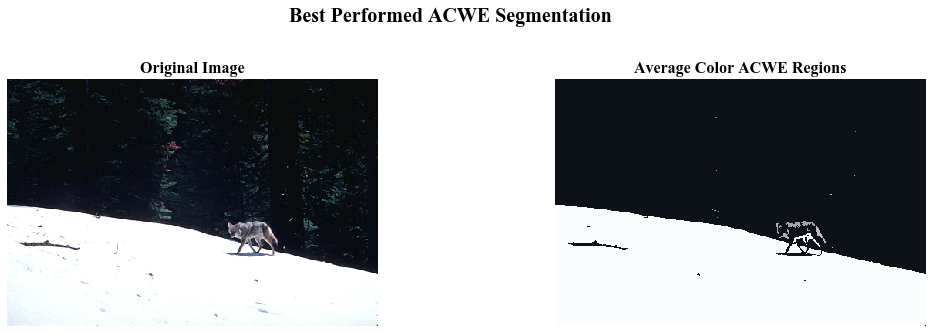

In [115]:
IBest = ((mpimg.imread(image_filenames[np.argmin(GCEColorTotal)])).astype(np.uint8))
I_grayBest=skimage.color.rgb2gray(IBest)
I_acwe, phi, energies = skimage.segmentation.chan_vese(I_grayBest,mu=0.01,tol\
    =1e-3,max_iter=500,init_level_set='checkerboard',extended_output=True)
SegBest = skimage.measure.label(I_acwe)

fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
plt.imshow(IBest)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(SLIC_avg_color(IBest,SegBest))
plt.title('Average Color ACWE Regions', fontsize = 16)
plt.axis('off')
plt.suptitle('Best Performed ACWE Segmentation', fontsize = 20)
plt.show()

In [116]:
print('GCE Value for Best Performance is:')
print(np.min(GCEColorTotal))
print('LCE Value for Best Performance is ')
print(np.min(LCEColorTotal))

GCE Value for Best Performance is:
0.016831167052415576
LCE Value for Best Performance is 
0.010853675075007601


Text(0.5, 0.98, 'Worst Performed ACWE Segmentation')

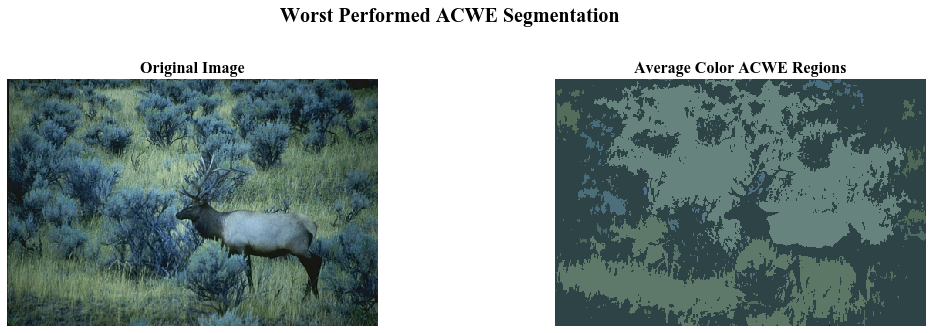

In [117]:
IWorst = ((mpimg.imread(image_filenames[np.argmax(GCEColorTotal)])).astype(np.uint8))
I_grayWorst=skimage.color.rgb2gray(IWorst)
I_acwe, phi, energies = skimage.segmentation.chan_vese(I_grayWorst,mu=0.01,tol\
    =1e-3,max_iter=500,init_level_set='checkerboard',extended_output=True)
SegWorst = skimage.measure.label(I_acwe)

fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
plt.imshow(IWorst)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(SLIC_avg_color(IWorst,SegWorst))
plt.title('Average Color ACWE Regions', fontsize = 16)
plt.axis('off')
plt.suptitle('Worst Performed ACWE Segmentation', fontsize = 20)

In [118]:
print('GCE Value for Worst Performance is:')
print(np.max(GCEColorTotal))
print('LCE Value for Worst Performance is ')
print(np.max(LCEColorTotal))

GCE Value for Worst Performance is:
0.557767005980876
LCE Value for Worst Performance is 
0.4389443263762832


### <span style='font-family:"Times New Roman"'> <span styel=''>In this part, the Chan-Vese algorithm is used. The algorithm is based on an energy minimization problem. Hence, as it can see, this algorithm has done a good job in segmenting an image which has uniform parts and it is less complex. Since on that picture, boundaries between regions are limited, the result is good.
### <span style='font-family:"Times New Roman"'> <span styel=''>In worst performance, still, this algorithm has found the edges and boundaries successfully. It has detected objects and their edges. However, it is not a successful segmentation because the final goal of segmentation is not to detect all the possible edges but to successfully detect the target object. The other important factor is the uniformity of color in the worst segmented image. This makes segmentation a challenging task too because the algorithm could not adhere to boundaries. The segmentation of deer body as green background is a sign of this claim.   


## <span style='font-family:"Times New Roman"'> <span styel=''>(e-v) (Graduate only) Optimize ACWE Segmentation Performance:

In [82]:
image_directory = 'BSDS300-images\\BSDS300\\images\\Train'
GT_Color_directory = 'Masks\\Color\\Train'
GT_Gray_directory = 'Masks\\Gray\\Train'
image_filenames = sorted(glob.glob(image_directory + '\\*.jpg'))
GTC_filenames = sorted(glob.glob(GT_Color_directory + '\\*.png'))
GTG_filenames = sorted(glob.glob(GT_Gray_directory + '\\*.png'))
GCEColorTotal = []
LCEColorTotal = []
GCEGrayTotal = []
LCEGrayTotal = []

MeanGCEColor = []
MeanLCEColor = []
MeanGCEGray = []
MeanLCEGray = []

MeanStdGCEColor = []
MeanStdLCEColor = []
MeanStdGCEGray = []
MeanStdLCEGray = []

start_time = time.time()
for m in range (1,26):
    for f,image_filename in enumerate(image_filenames):
        image = image_filenames[f]
        GTC = GTC_filenames[f]
        GTG = GTG_filenames[f]
        TI = ((mpimg.imread(image)).astype(np.uint8))
        GTColor = (Image.open(GTC))
        GTGray = (Image.open(GTG))
        I_gray=skimage.color.rgb2gray(TI)
        I_acwe, phi, energies = skimage.segmentation.chan_vese(I_gray,mu=m/100,tol\
        =1e-3,max_iter=500,init_level_set='checkerboard',extended_output=True)
        Seg = skimage.measure.label(I_acwe)
        GCEColor , LCEColor, Time = compute_GCE_LCE(Seg,np.array(GTColor)[:,:,0])
        GCEGray , LCEGray, Time = compute_GCE_LCE(Seg,np.array(GTGray)[:,:,0])
        GCEColorTotal = np.append(GCEColorTotal, GCEColor)
        LCEColorTotal = np.append(LCEColorTotal, LCEColor)
        GCEGrayTotal = np.append(GCEGrayTotal, GCEGray)
        LCEGrayTotal = np.append(LCEGrayTotal, LCEGray)

        
    MeanGCEColor = np.append(MeanGCEColor, np.mean(GCEColorTotal))
    MeanLCEColor = np.append(MeanLCEColor, np.mean(LCEColorTotal))
    MeanGCEGray = np.append(MeanGCEGray, np.mean(GCEGrayTotal))
    MeanLCEGray = np.append(MeanLCEGray, np.mean(LCEGrayTotal))
    
    MeanStdGCEColor = np.append(MeanStdGCEColor, np.std(GCEColorTotal))
    MeanStdLCEColor = np.append(MeanStdLCEColor, np.std(LCEColorTotal))
    MeanStdGCEGray = np.append(MeanStdGCEGray, np.std(GCEGrayTotal))
    MeanStdLCEGray = np.append(MeanStdLCEGray, np.std(LCEGrayTotal))
elapsed_time = time.time() - start_time

In [83]:
print('Elapsed Time (Hours) :')
print(elapsed_time/3600)

Elapsed Time (Hours) :
36.49436589360237


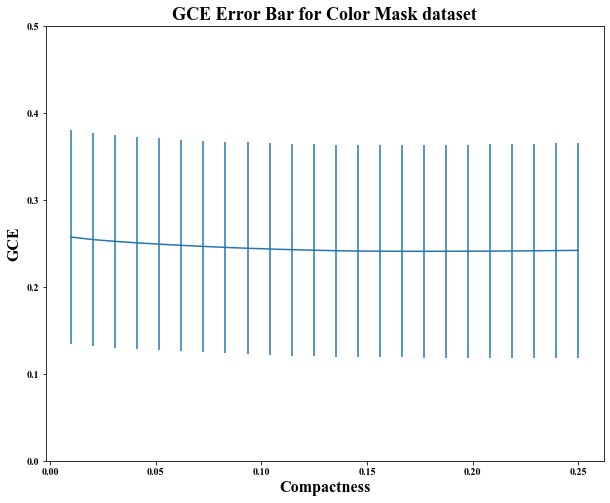

In [99]:
plt.figure(figsize=(10,8))
plt.errorbar(np.linspace(0.01,0.25,25),MeanGCEColor,yerr=MeanStdGCEColor)
plt.title('GCE Error Bar for Color Mask dataset', fontsize = 18)
plt.ylim(0,0.5)
plt.xlabel('Compactness', fontsize=16)
plt.ylabel('GCE', fontsize=16)
plt.show()

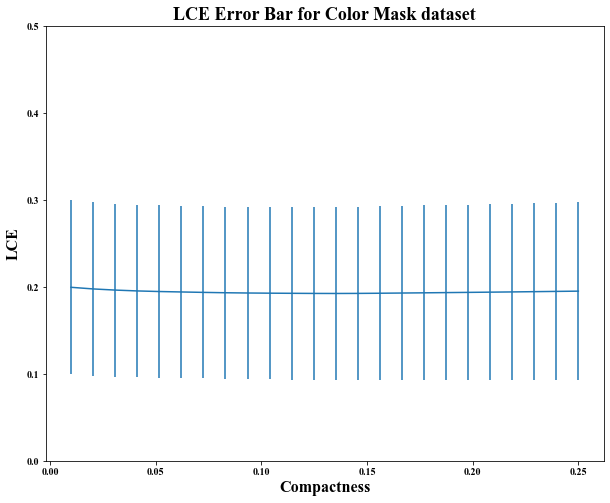

In [100]:
plt.figure(figsize=(10,8))
plt.errorbar(np.linspace(0.01,0.25,24),MeanLCEColor,yerr=MeanStdLCEColor)
plt.title('LCE Error Bar for Color Mask dataset', fontsize = 18)
plt.ylim(0,0.5)
plt.xlabel('Compactness', fontsize=16)
plt.ylabel('LCE', fontsize=16)
plt.show()

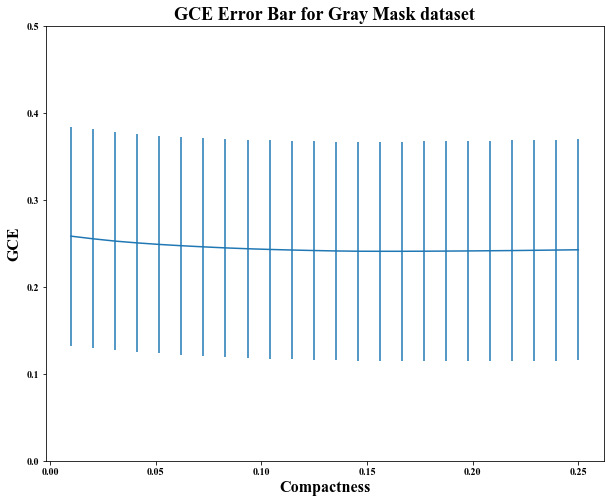

In [101]:
plt.figure(figsize=(10,8))
plt.errorbar(np.linspace(0.01,0.25,24),MeanGCEGray,yerr=MeanStdGCEGray)
plt.title('GCE Error Bar for Gray Mask dataset', fontsize = 18)
plt.ylim(0,0.5)
plt.xlabel('Compactness', fontsize=16)
plt.ylabel('GCE', fontsize=16)
plt.show()

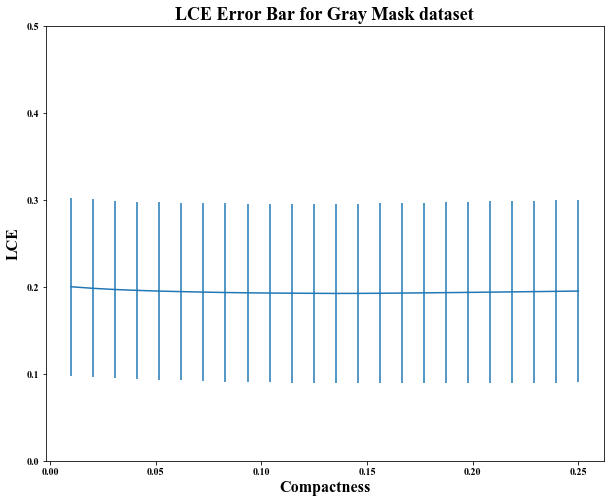

In [102]:
plt.figure(figsize=(10,8))
plt.errorbar(np.linspace(0.01,0.25,24),MeanLCEGray,yerr=MeanStdLCEGray)
plt.title('LCE Error Bar for Gray Mask dataset', fontsize = 18)
plt.ylim(0,0.5)
plt.xlabel('Compactness', fontsize=16)
plt.ylabel('LCE', fontsize=16)
plt.show()

### <span style='font-family:"Times New Roman"'> <span styel=''> Since I am using GCE values for Color image segmentation as a reference, $\mu$ = 0.15 seems like a best value since it has lower error compared to others. 

In [103]:
image_directory = 'BSDS300-images\\BSDS300\\images\\test'
GT_Gray_directory = 'Masks\\Gray\\Test'
GT_Color_directory = 'Masks\\Color\\Test'
image_filenames = sorted(glob.glob(image_directory + '\\*.jpg'))
GTG_filenames = sorted(glob.glob(GT_Gray_directory + '\\*.png'))
GTC_filenames = sorted(glob.glob(GT_Color_directory + '\\*.png'))
GCEColorTotal = []
LCEColorTotal = []
GCEGrayTotal = []
LCEGrayTotal = []
start_time = time.time()
for f,image_filename in enumerate(image_filenames):
    image = image_filenames[f]
    GTG = GTG_filenames[f]
    GTC = GTC_filenames[f]
    TI = ((mpimg.imread(image)).astype(np.uint8))
    I_gray=skimage.color.rgb2gray(TI)
    I_acwe, phi, energies = skimage.segmentation.chan_vese(I_gray,mu=0.15,tol\
    =1e-3,max_iter=500,init_level_set='checkerboard',extended_output=True)
    Seg = skimage.measure.label(I_acwe)
    GTGray = (Image.open(GTG))
    GTColor = (Image.open(GTC))
    GCEGray , LCEGray , Time = compute_GCE_LCE(Seg,np.array(GTGray)[:,:,0])
    GCEGrayTotal = np.append(GCEGrayTotal, GCEGray)
    LCEGrayTotal = np.append(LCEGrayTotal, LCEGray)
    GCEColor , LCEColor, Time = compute_GCE_LCE(Seg,np.array(GTColor)[:,:,0])
    GCEColorTotal = np.append(GCEColorTotal, GCEColor)
    LCEColorTotal = np.append(LCEColorTotal, LCEColor)
elapsed_time = time.time() - start_time

In [104]:
print('Elapsed Time (Minutes) :')
print(elapsed_time/60)
print('Mean of GCE Values for Color Mask with Respective Standard Deviation :')
print(str(np.mean(GCEColorTotal)), '+-' ,str(np.std(GCEColorTotal)))
print('Mean of LCE Values for Color Mask with Respective Standard Deviation :')
print(str(np.mean(LCEColorTotal)), '+-' ,str(np.std(LCEColorTotal)))
print('Mean of GCE Values for Gray Mask with Respective Standard Deviation :')
print(str(np.mean(GCEGrayTotal)), '+-' ,str(np.std(GCEGrayTotal)))
print('Mean of LCE Values for Gray Mask with Respective Standard Deviation :')
print(str(np.mean(LCEGrayTotal)), '+-' ,str(np.std(LCEGrayTotal)))  

Elapsed Time (Minutes) :
42.961678206920624
Mean of GCE Values for Color Mask with Respective Standard Deviation :
0.24657208247291504 +- 0.1276981800914435
Mean of LCE Values for Color Mask with Respective Standard Deviation :
0.2022005602046579 +- 0.10847803180955708
Mean of GCE Values for Gray Mask with Respective Standard Deviation :
0.2567295074348618 +- 0.12297785006893017
Mean of LCE Values for Gray Mask with Respective Standard Deviation :
0.21231338548857603 +- 0.10682842808225347


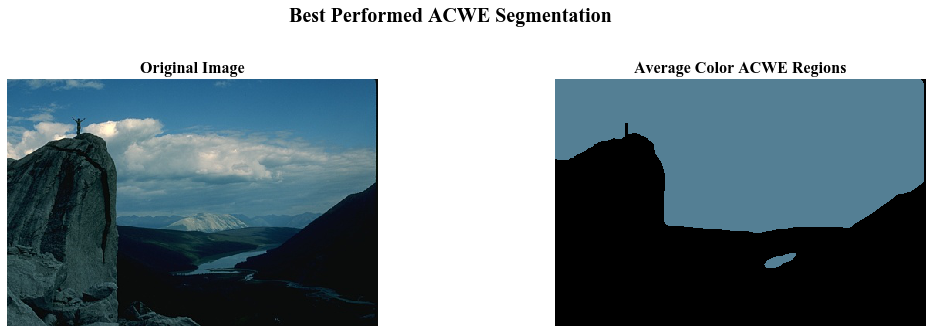

In [106]:
IBest = ((mpimg.imread(image_filenames[np.argmin(GCEColorTotal)])).astype(np.uint8))
I_grayBest=skimage.color.rgb2gray(IBest)
I_acwe, phi, energies = skimage.segmentation.chan_vese(I_grayBest,mu=0.15,tol\
    =1e-3,max_iter=500,init_level_set='checkerboard',extended_output=True)
SegBest = skimage.measure.label(I_acwe)

fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
plt.imshow(IBest)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(SLIC_avg_color(IBest,SegBest))
plt.title('Average Color ACWE Regions', fontsize = 16)
plt.axis('off')
plt.suptitle('Best Performed ACWE Segmentation', fontsize = 20)
plt.show()

In [108]:
print('GCE Value for Best Performance is:')
print(np.min(GCEColorTotal))
print('LCE Value for Best Performance is ')
print(np.min(LCEColorTotal))

GCE Value for Best Performance is:
0.01431842540881493
LCE Value for Best Performance is 
0.009445834925897453


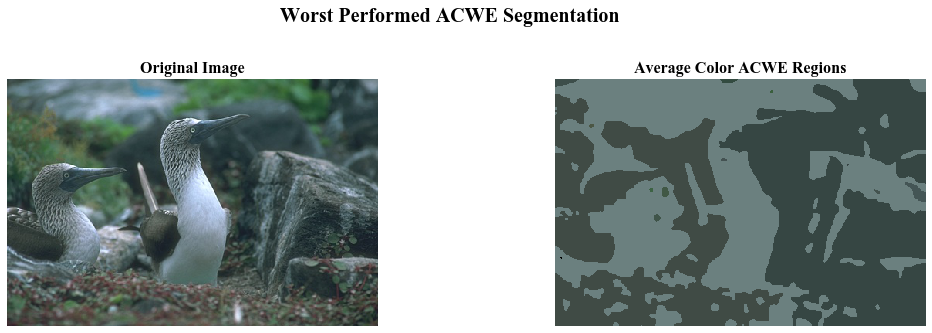

In [111]:
IWorst = ((mpimg.imread(image_filenames[np.argmax(GCEColorTotal)])).astype(np.uint8))
I_grayWorst=skimage.color.rgb2gray(IWorst)
I_acwe, phi, energies = skimage.segmentation.chan_vese(I_grayWorst,mu=0.15,tol\
    =1e-3,max_iter=500,init_level_set='checkerboard',extended_output=True)
SegWorst = skimage.measure.label(I_acwe)

fig = plt.subplots(figsize=(18, 10))
plt.subplot(2, 2, 1)
plt.imshow(IWorst)
plt.title('Original Image', fontsize = 16)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(SLIC_avg_color(IWorst,SegWorst))
plt.title('Average Color ACWE Regions', fontsize = 16)
plt.axis('off')
plt.suptitle('Worst Performed ACWE Segmentation', fontsize = 20)
plt.show()

In [112]:
print('GCE Value for Worst Performance is:')
print(np.max(GCEColorTotal))
print('LCE Value for Worst Performance is ')
print(np.max(LCEColorTotal))

GCE Value for Worst Performance is:
0.5424246808300929
LCE Value for Worst Performance is 
0.4991739322122506


### <span style='font-family:"Times New Roman"'> <span styel=''> Same arguments for the best and the worst segmented images still holds for the optimized section. The interesting part about optimizing mu is although it decreased the GCE value for worst performance, the LCE value is increased. 

## <span style='font-family:"Times New Roman"'> <span styel=''>(f) Summary:

### <span style='font-family:"Times New Roman"'> <span styel=''>As we walked through this project, we saw that image segmentation is a difficult task, and it needs huge computation effort. The BSDS dataset used here, is a small dataset both number wise as well as image size wise.
### <span style='font-family:"Times New Roman"'> <span styel=''>The ACWE segmentation for 400 small images took more than 36 hours (without parallel computing on GPU) while real images would have huge size and hence, much more computational effort would be required. So, the importance of parallel computing on GPU would be recognized here.
### <span style='font-family:"Times New Roman"'> <span styel=''>In my idea SLIC superpixel segmentation is considerably better that ACWE segmentation. SLIC is exceptionally faster and yields to low GCE and LCE values. Looking at best performance segmentations both algorithms have done a good job (not the best) in segmenting the images especially after optimization.
### <span style='font-family:"Times New Roman"'> <span styel=''>Different issues may affect the segmentation performance like noise, the type of objects in background and their color difference. Several actions could be performed prior to segmentation to improve the segmentation accuracy.
### <span style='font-family:"Times New Roman"'> <span styel=''>For instance, for noisy images, we could smooth the image. 
### <span style='font-family:"Times New Roman"'> <span styel=''>Also, in some cases, we can sharpen the image edges so the algorithm would be able to detect the boundaries better.
### <span style='font-family:"Times New Roman"'> <span styel=''>After all said and done, segmentation based on state of an art convolutional neural networks should out perform these methods in accuracy as well as efficiency.   
